<a href="https://colab.research.google.com/github/EbenMY/Ebenezer-Yawlui/blob/main/UCLAplotinvertedpendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
plt.figure()
plt.plot(np.real(z), np.imag(z), 'o', label='Zeros')
plt.plot(np.real(p), np.imag(p), 'x', label='Poles')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
unit_circle = plt.Circle((0, 0), 1, color='black', fill=False, ls='dotted')
plt.gca().add_artist(unit_circle)
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will open a file chooser


Saving 241203.zip to 241203.zip


In [ ]:
import zipfile

with zipfile.ZipFile("241203.zip", 'r') as zip_ref:
    zip_ref.extractall()  # Extracts to '241203' in Colab


In [ ]:
import zipfile

with zipfile.ZipFile("241203.zip", 'r') as zip_ref:
    zip_ref.extractall()  # This will create the '241203' folder in Colab


In [ ]:
import os
print(os.listdir("241203"))  # Should list the CSV files


['rotation_1.csv', 'rotation_4.csv', 'rotation_2.csv', 'fft_result_MODE_INDIVIDUAL_rotation.csv', 'data_stuff.py', 'result_MODE_LINEAR_ROTATIONAL_rotation_manual.csv', 'fft_result_MODE_LINEAR_ROTATIONAL_baseline_obj.csv', 'result_MODE_LINEAR_ROTATIONAL_baseline_obj.csv', 'baseline_1.csv', 'fft_result_MODE_LINEAR_ROTATIONAL_rotation.csv', 'fft_result_MODE_LINEAR_ROTATIONAL_rotation_manual.csv', 'rotation_3.csv', 'result_MODE_LINEAR_ROTATIONAL_rotation.csv', 'base_line_3.csv', 'baseline_2.csv', 'result_MODE_INDIVIDUAL_rotation.csv', 'INDIVIDUAL_meassurments.csv', 'INDIVIDUAL_meassurments_2.csv']


In [ ]:
file_name = 'rotation_3'
extension = '.csv'
data = np.genfromtxt('241203/' + file_name + extension, delimiter=',', skip_header=1)
start, end = 600, 11514
data = data[start:end, :]
print(data.shape)


(10914, 4)


(12122, 4)
Saved column 0 analysis to rotation_3_graphs/column_0_analysis.png
Saved column 1 analysis to rotation_3_graphs/column_1_analysis.png
Saved column 2 analysis to rotation_3_graphs/column_2_analysis.png
Saved column 3 analysis to rotation_3_graphs/column_3_analysis.png
Saved column 0 analysis to rotation_3_laplacian_stacks/column_0_analysis.png
Saved column 1 analysis to rotation_3_laplacian_stacks/column_1_analysis.png
Saved column 2 analysis to rotation_3_laplacian_stacks/column_2_analysis.png
Saved column 3 analysis to rotation_3_laplacian_stacks/column_3_analysis.png


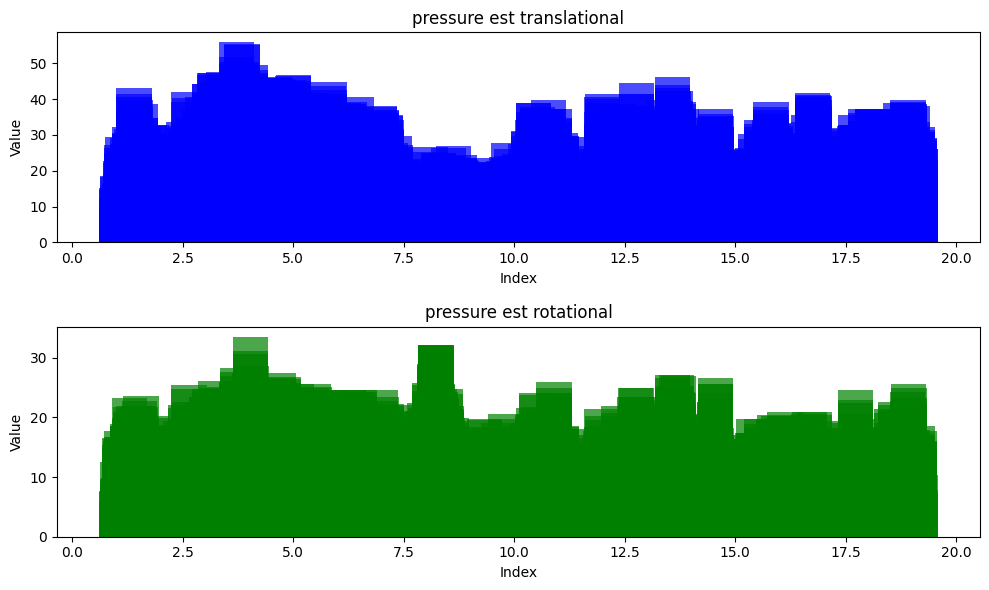

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d, median_filter, maximum_filter, minimum_filter, uniform_filter
from scipy.signal import stft
from sklearn.preprocessing import MinMaxScaler





# Load the data
file_name = 'baseline_1'
file_name = 'baseline_2'

file_name = 'rotation_1'

#2, 7, 12
file_name = 'rotation_2'

#5, 15
file_name = 'rotation_3'


#file_name = 'INDIVIDUAL_meassurments'

#
extension = '.csv'
data = np.genfromtxt('241203/' + file_name + extension, delimiter=',', skip_header=1)
# Extract a range
print(data.shape)
start, end = 600, 11514
data = data[start:end, :]


#scaler = MinMaxScaler(feature_range=(0, 1))  # Default range is (0, 1)
#data = scaler.fit_transform(data)

#Linear Rotational:
#data = data[::2, :2] - data[1::2, 2:]

# Apply Gaussian smoothing
smoothed_data = np.apply_along_axis(gaussian_filter1d, axis=0, arr=data, sigma= 1, mode='nearest')

# Apply Meadian filtering
#window_size = 6
#smoothed_data =  np.apply_along_axis(uniform_filter, axis=0, arr=data,  size=window_size)


# Apply Median filtering
median_filtered_data = np.apply_along_axis(median_filter, axis=0, arr=data, size=6)

# Apply Max filtering
max_filtered_data = np.apply_along_axis(maximum_filter, axis=0, arr=data, size=12)
min_filtered_data = np.apply_along_axis(minimum_filter, axis=0, arr=data, size=6)
#max_filtered_data = np.sqrt((max_filtered_data - min_filtered_data) ** 2)
# Create output folder
output_folder = file_name + "_graphs"
os.makedirs(output_folder, exist_ok=True)

row_numbers = np.arange(end - start)/600 + 1


# Loop through each column
DISPLAY = False
columns = data.shape[1]
# columns = 1 just first one
for i in range(columns):  # Iterate over all 36 columns
    original_column = data[:, i]
    smoothed_column = smoothed_data[:, i]
    median_column = median_filtered_data[:, i]
    max_column = max_filtered_data[:, i]

    # Perform Short-Time Fourier Transform (STFT)
    # 8 for not Normalized
    f, t, Zxx = stft(original_column, nperseg=11)

    # Create the row numbers (index)

    # Plot in grids
    fig, axs = plt.subplots(5, 1, figsize=(12, 15), constrained_layout=True)

    # Original Data
    axs[0].plot(row_numbers, original_column, color="blue", label="Original")
    axs[0].set_title("Original Data")
    axs[0].set_xlabel("Row Number")
    axs[0].set_ylabel("Value")
    axs[0].grid(True)

    # Gaussian Smoothed Data
    axs[1].plot(row_numbers, smoothed_column, color="orange", label="Gaussian Smoothed")
    axs[1].set_title("Gaussian Smoothed Data")
    axs[1].set_xlabel("Row Number")
    axs[1].set_ylabel("Value")
    axs[1].grid(True)

    # Median Filtered Data
    axs[2].plot(row_numbers, median_column, color="green", label="Median Filtered")
    axs[2].set_title("Median Filtered Data")
    axs[2].set_xlabel("Row Number")
    axs[2].set_ylabel("Value")
    axs[2].grid(True)

    # Max Filtered Data
    axs[3].plot(row_numbers, max_column, color="red", label="Max Filtered")
    axs[3].set_title("Max Filtered Data")
    axs[3].set_xlabel("Row Number")
    axs[3].set_ylabel("Value")
    axs[3].grid(True)

    # STFT Magnitude
    im = axs[4].pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='viridis')
    axs[4].set_title("Short-Time Fourier Transform (STFT)")
    axs[4].set_xlabel("Time")
    axs[4].set_ylabel("Frequency")
    fig.colorbar(im, ax=axs[4], orientation="vertical", label="Magnitude")

    # Save the figure to the output folder

    if DISPLAY:

        fig, axs = plt.subplots(1, 1, figsize=(8, 6))

        # Plot using pcolormesh
        im = axs.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='viridis')

        # Set title and labels
        axs.set_title("Short-Time Fourier Transform (STFT)")
        axs.set_xlabel("Time")
        axs.set_ylabel("Frequency")

        # Add colorbar
        fig.colorbar(im, ax=axs, orientation="vertical", label="Magnitude")

        plt.show()
    else:
        output_path = os.path.join(output_folder, f"column_{i}_analysis.png")
        plt.savefig(output_path)
        plt.close(fig)  # Close the figure to free memory

        print(f"Saved column {i} analysis to {output_path}")


''' Single Plot

# Create the plot

plt.show()
'''



import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Function to create Laplacian Stack
def create_laplacian_stack(data, sigmas):
    laplacian_stack = []
    blurred_data = data
    first = True

    for j, sigma in enumerate(sigmas):
        # Apply Gaussian filter at each scale
        smoothed_data = np.apply_along_axis(gaussian_filter1d, axis=0, arr=blurred_data, sigma=sigma, mode='nearest')

        # Calculate the Laplacian (original - smoothed)
        laplacian = blurred_data - smoothed_data
        blurred_data = smoothed_data

        if j == len(sigmas) - 1:
            laplacian_stack.append(blurred_data)
        else:
            laplacian_stack.append(laplacian)

    return laplacian_stack

# Define different sigmas (scales for Gaussian filter)

output_folder = file_name + "_laplacian_stacks"
os.makedirs(output_folder, exist_ok=True)

sigmas = [1, 2, 4, 8, 16]


for i in range(columns):  # Iterate over all 36 columns
    original_column = data[:, i]

    # Create Laplacian stack
    laplacian_stack = create_laplacian_stack(original_column, sigmas)
    # Visualize the Laplacian stack
    fig, axes = plt.subplots(len(laplacian_stack), 1, figsize=(8, len(laplacian_stack)*3))

    for j, ax in enumerate(axes):
        # Gaussian Smoothed Data
        ax.plot(row_numbers, laplacian_stack[j], color="orange", label="Gaussian Smoothed")
        ax.set_title(f'Laplacian at sigma={sigmas[j]}')
        ax.set_xlabel("Row Number")
        ax.set_ylabel("Value")
    ax.grid(True)


    output_path = os.path.join(output_folder, f"column_{i}_analysis.png")
    plt.savefig(output_path)
    plt.close(fig)  # Close the figure to free memory
    print(f"Saved column {i} analysis to {output_path}")




output_folder = file_name + "preassure_diff_analysis"
os.makedirs(output_folder, exist_ok=True)


# Parameters
window_size = 6

# Smooth the data along the rows (axis=0)
avg_filter_data = np.apply_along_axis(uniform_filter, axis=0, arr=data, size=window_size, mode='nearest')

# Compute diff_data and pressure_est
diff_data = avg_filter_data[:, [0, 2]] - avg_filter_data[:, [1, 3]]
running_sum = np.cumsum(diff_data, axis=0)

pressure_est = np.abs(avg_filter_data[:, [0, 2]]) + np.abs(avg_filter_data[:, [1, 3]])

max_pressure = np.max(pressure_est)

# Apply condition: set `diff_data` to 0 where `pressure_est` exceeds 70% of max_pressure
#threshold = 0.7 * max_pressure
#diff_data = np.where(pressure_est > smoothed_data, 0, diff_data)


# Create 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Top row - Bar chart for diff_data[0]
ax[0, 0].bar(row_numbers, diff_data[:, 0], color='blue', alpha=0.7, label='diff_data (Top row)')
ax[0, 0].set_title('translational diff data')
ax[0, 0].set_xlabel('Row Numbers')
ax[0, 0].set_ylabel('Value')
ax[0, 0].legend()
ax[0, 0].grid(True, linestyle='--', alpha=0.5)

# Top row - Running sum for diff_data[0]
ax[0, 1].plot(row_numbers, running_sum[:, 0], color='red', linewidth=2, label='Running Sum (Top row)')
ax[0, 1].set_title('Running Sum')
ax[0, 1].set_xlabel('Row Numbers')
ax[0, 1].set_ylabel('Running Sum')
ax[0, 1].legend()
ax[0, 1].grid(True, linestyle='--', alpha=0.5)
#ax[0, 1].set_aspect('equal', adjustable='datalim')

# Bottom row - Bar chart for diff_data[1]
ax[1, 0].bar(row_numbers, diff_data[:, 1], color='green', alpha=0.7, label='diff_data (Bottom row)')
ax[1, 0].set_title('rotational diff data')
ax[1, 0].set_xlabel('Row Numbers')
ax[1, 0].set_ylabel('Value')
ax[1, 0].legend()
ax[1, 0].grid(True, linestyle='--', alpha=0.5)

# Bottom row - Running sum for diff_data[1]
ax[1, 1].plot(row_numbers, running_sum[:, 1], color='orange', linewidth=2, label='Running Sum (Bottom row)')
ax[1, 1].set_title('Running Sum (Bottom Row)')
ax[1, 1].set_xlabel('Row Numbers')
ax[1, 1].set_ylabel('Running Sum')
ax[1, 1].legend()
ax[1, 1].grid(True, linestyle='--', alpha=0.5)
#ax[1, 1].set_aspect('equal', adjustable='datalim')


output_path = os.path.join(output_folder, f"diff.png")
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)  #

plt.savefig(output_path)
plt.close(fig)  # Close the figure to free memory


# Plot `diff_data` as a bar chart
fig2, ax2 = plt.subplots(2, 1, figsize=(10, 6))

# Plot top row of diff_data as a bar chart
ax2[0].bar(row_numbers, pressure_est[:, 0], color='blue', alpha=0.7)
ax2[0].set_title('pressure est translational')
ax2[0].set_xlabel('Index')
ax2[0].set_ylabel('Value')

# Plot bottom row of diff_data as a bar chart
ax2[1].bar(row_numbers, pressure_est[:, 1], color='green', alpha=0.7)
ax2[1].set_title('pressure est rotational')
ax2[1].set_xlabel('Index')
ax2[1].set_ylabel('Value')


plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)  #


output_path = os.path.join(output_folder, f"pressure.png")
plt.savefig(output_path)
plt.close(fig)  # Close the figure to free memory

#plt.show()




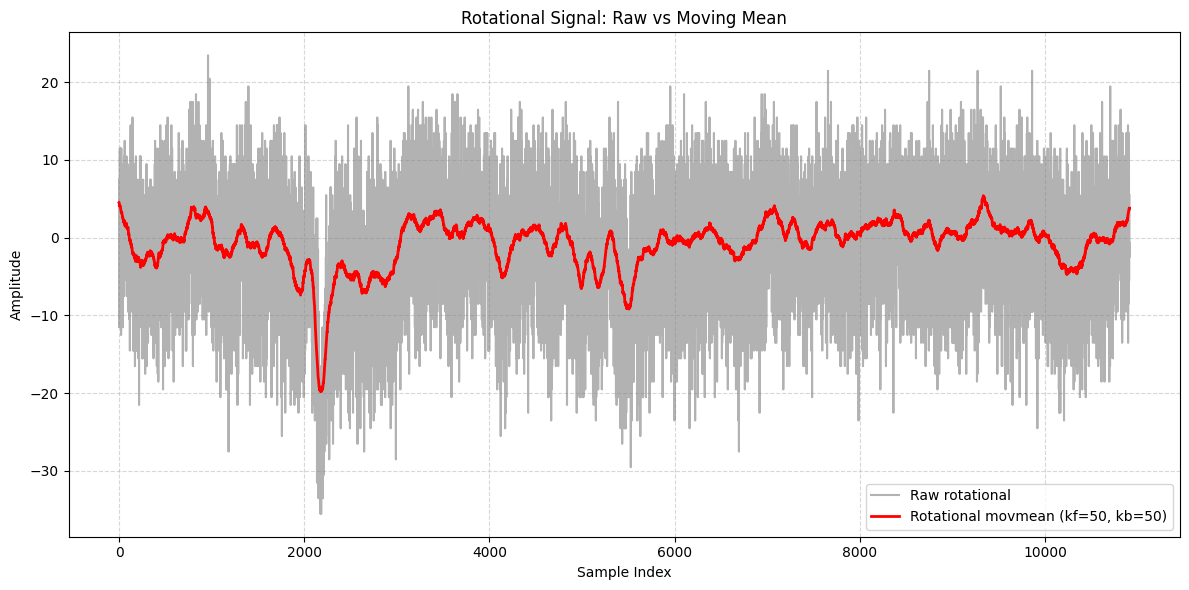

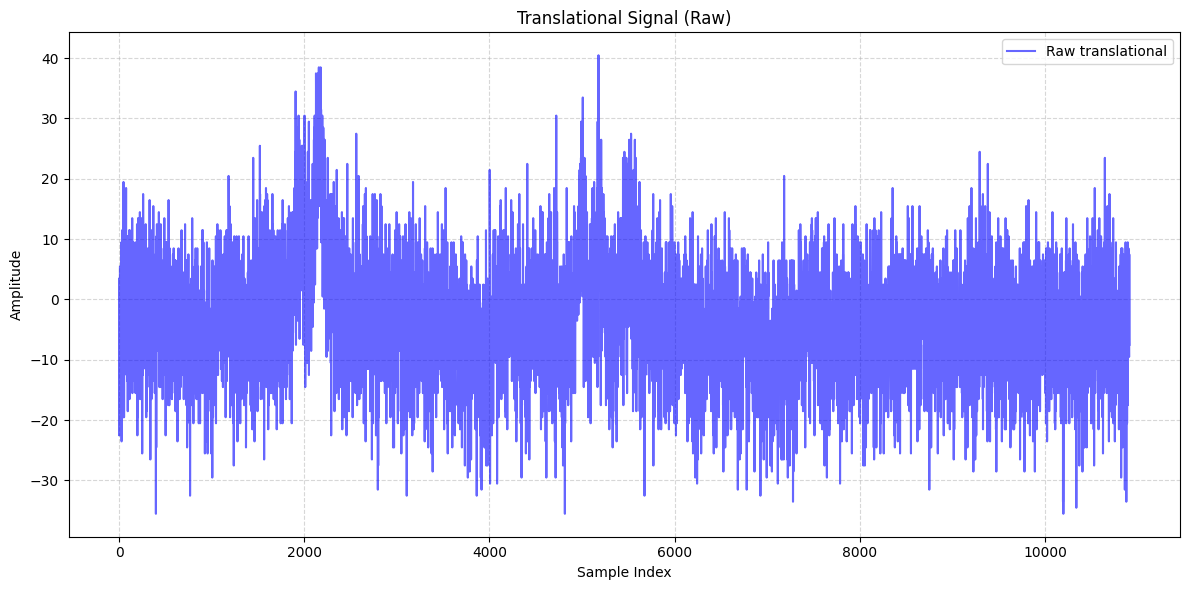

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# -------------------------
# Load data
# -------------------------
file_name = 'rotation_2'
data = np.genfromtxt(f'241203/{file_name}.csv', delimiter=',', skip_header=1)

# Crop data (same as your script)
start, end = 600, 11514
data = data[start:end, :]

# -------------------------
# Translational & Rotational signals
# -------------------------
translational = data[:, 0] - data[:, 1]
rotational = data[:, 2] - data[:, 3]

# -------------------------
# Moving mean filter
# MATLAB: movmean(x, [kf kb])
# -------------------------
kf = 50
kb = 50
window_size = kf + kb + 1

rotational_movmean = uniform_filter1d(
    rotational,
    size=window_size,
    mode='nearest'
)

# -------------------------
# X-axis
# -------------------------
samples = np.arange(len(rotational))

# -------------------------
# Plot
# -------------------------
plt.figure(figsize=(12, 6))

plt.plot(samples, rotational, color='gray', alpha=0.6, label='Raw rotational')
plt.plot(samples, rotational_movmean, color='red', linewidth=2,
         label='Rotational movmean (kf=50, kb=50)')

plt.title('Rotational Signal: Raw vs Moving Mean')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.figure(figsize=(12, 6))

plt.plot(samples, translational, color='blue', alpha=0.6,
         label='Raw translational')

plt.title('Translational Signal (Raw)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

plt.show()


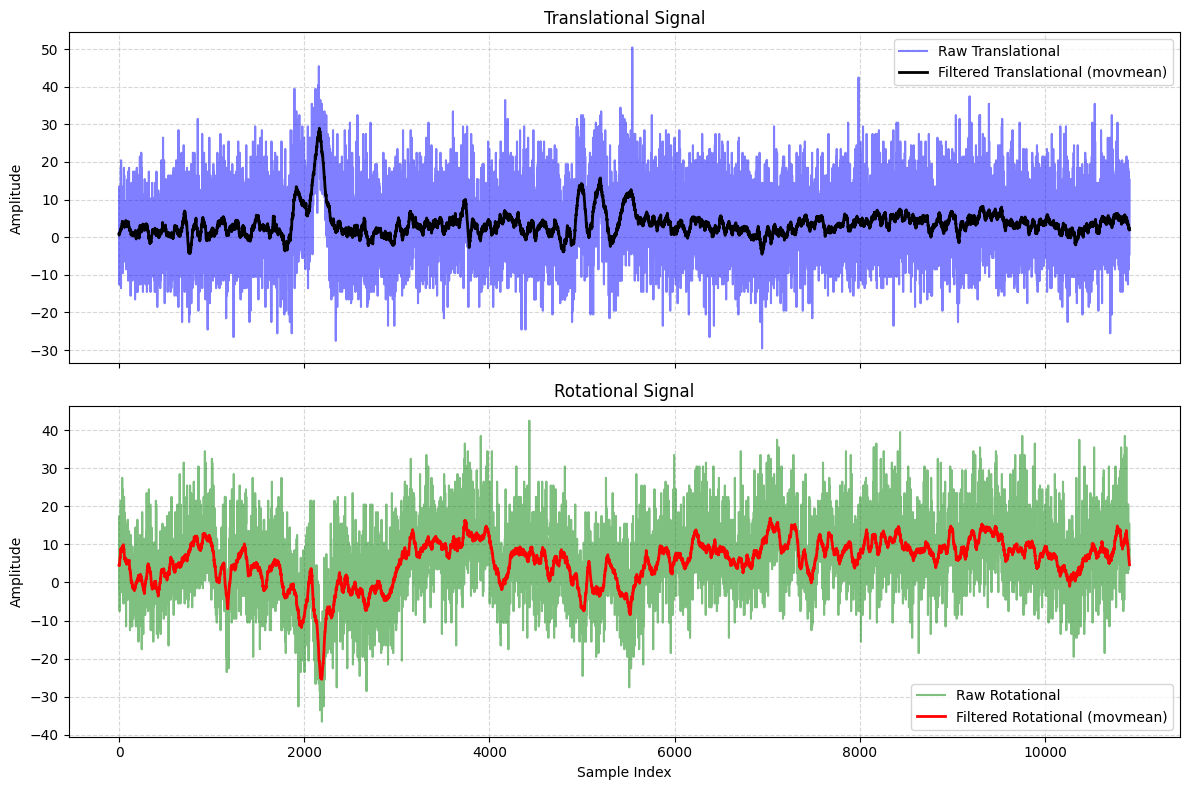

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Parameters
# -------------------------
file_name = "rotation_2"          # change as needed
folder = "241203"
extension = ".csv"

start, end = 600, 11514
kf = 20   # forward window
kb = 20   # backward window
window = kf + kb + 1

# -------------------------
# Load data
# -------------------------
data = np.genfromtxt(
    f"{folder}/{file_name}{extension}",
    delimiter=",",
    skip_header=1
)

data = data[start:end, :]
samples = np.arange(len(data))

# -------------------------
# Translational & Rotational signals
# (column indexing is 0-based in Python)
# -------------------------
# Translational = column 0 - column 1
translational = data[:, 3] - data[:, 1]

# Rotational = column 2 - column 3
rotational = data[:, 2] - data[:, 0]

# -------------------------
# Moving mean filter (MATLAB: movmean(x,[kb kf]))
# -------------------------
kernel = np.ones(window) / window

translational_filt = np.convolve(translational, kernel, mode="same")
rotational_filt = np.convolve(rotational, kernel, mode="same")

# -------------------------
# Plot results
# -------------------------
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# --- Translational ---
ax[0].plot(samples, translational, color="blue", alpha=0.5,
           label="Raw Translational")
ax[0].plot(samples, translational_filt, color="black", linewidth=2,
           label="Filtered Translational (movmean)")
ax[0].set_title("Translational Signal")
ax[0].set_ylabel("Amplitude")
ax[0].grid(True, linestyle="--", alpha=0.5)
ax[0].legend()

# --- Rotational ---
ax[1].plot(samples, rotational, color="green", alpha=0.5,
           label="Raw Rotational")
ax[1].plot(samples, rotational_filt, color="red", linewidth=2,
           label="Filtered Rotational (movmean)")
ax[1].set_title("Rotational Signal")
ax[1].set_xlabel("Sample Index")
ax[1].set_ylabel("Amplitude")
ax[1].grid(True, linestyle="--", alpha=0.5)
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
!pip install apriltag
import apriltag

# Initialize AprilTag detector
options = apriltag.DetectorOptions(families="tag36h11")  # Set the family of AprilTags (e.g., tag16h05)
detector = apriltag.Detector(options)
#detector = apriltag.Detector()

# Open video capture
cap = cv2.VideoCapture('tst.mov')

# Get video properties (frame width, height, and FPS) to configure the VideoWriter
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Create VideoWriter object to save the video with annotations
out = cv2.VideoWriter('pendulum_with_annotations.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for AprilTag detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect AprilTags in the frame
    results = detector.detect(gray)

    pts_base = None
    pts_weight = None

    # Process the detected AprilTags
    for detection in results:
        print(len(results))
        # Check the ID of each detected tag
        if detection.tag_id == 0:  # Assume ID 0 is the base tag
            pts_base = np.array(detection.corners, dtype=np.int32)
        elif detection.tag_id == 1:  # Assume ID 1 is the weight tag
            pts_weight = np.array(detection.corners, dtype=np.int32)

    if pts_base is not None and pts_weight is not None:
        # Calculate the center positions of each AprilTag
        base_pos = np.mean(pts_base, axis=0)
        weight_pos = np.mean(pts_weight, axis=0)

        # Calculate the angle between the base and weight positions
        delta_x = weight_pos[0] - base_pos[0]
        delta_y = weight_pos[1] - base_pos[1]
        angle = np.arctan2(delta_y, delta_x) * (180 / np.pi)  # in degrees

        # Calculate distance between the two AprilTags
        distance = np.linalg.norm(weight_pos - base_pos)

        # Draw a line between the two AprilTag centers
        cv2.line(frame, tuple(base_pos.astype(int)), tuple(weight_pos.astype(int)), (0, 255, 0), 3)

        # Display angle and distance
        cv2.putText(frame, f"Angle: {angle:.2f} degrees", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame, f"Distance: {distance:.2f} px", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Write the frame with annotations to the output video file
    out.write(frame)

    # Show frame with AprilTag detection
    cv2.imshow("Pendulum Tracking", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()  # Close the output video file
cv2.destroyAllWindows()

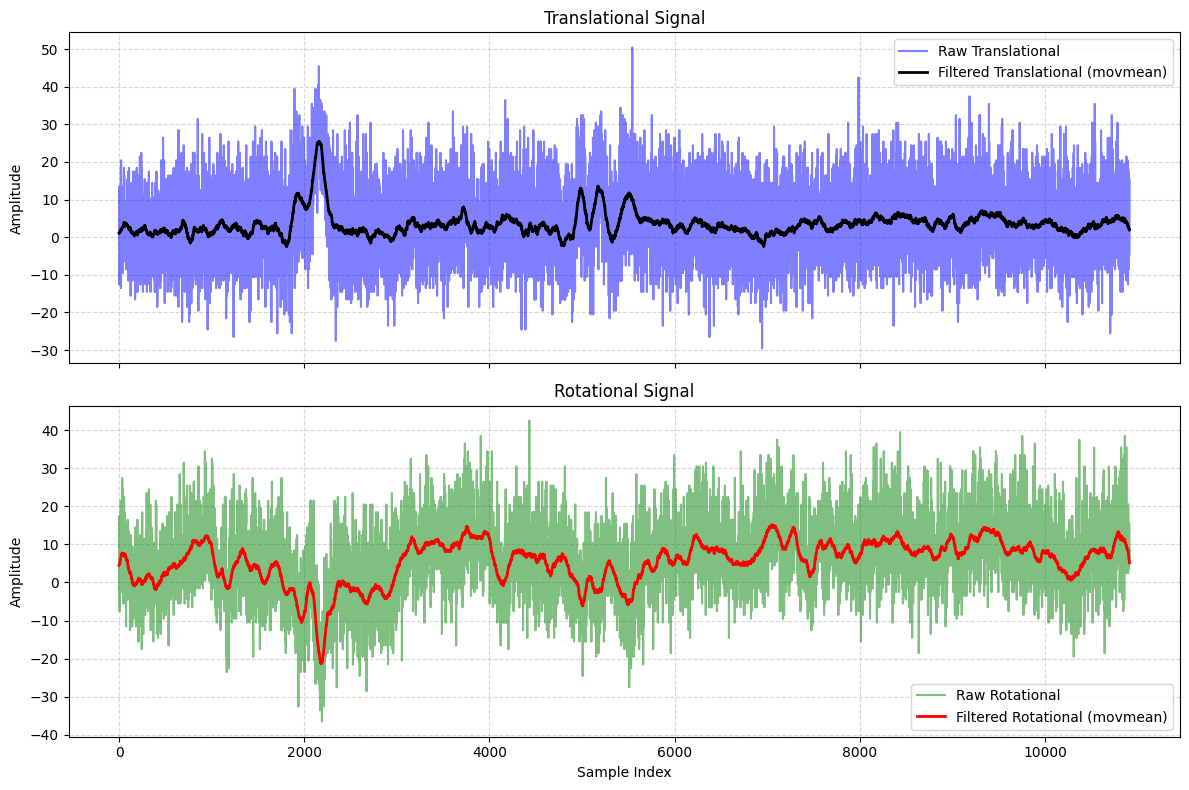

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Parameters
# -------------------------
file_name = "rotation_2.csv"   # CSV is in the same directory as this script

start, end = 600, 11514
kf = 40   # forward window
kb = 40   # backward window
window = kf + kb + 1

# -------------------------
# Load data (directly)
# -------------------------
data = np.genfromtxt(
    file_name,
    delimiter=",",
    skip_header=1
)

data = data[start:end, :]
samples = np.arange(len(data))

# -------------------------
# Translational & Rotational signals
# (column indexing is 0-based)
# -------------------------
# Translational = column 3 - column 1
translational = data[:, 3] - data[:, 1]

# Rotational = column 2 - column 0
rotational = data[:, 2] - data[:, 0]

# -------------------------
# Moving mean filter (MATLAB: movmean(x,[kb kf]))
# -------------------------
kernel = np.ones(window) / window

translational_filt = np.convolve(translational, kernel, mode="same")
rotational_filt = np.convolve(rotational, kernel, mode="same")

# -------------------------
# Plot results
# -------------------------
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# --- Translational ---
ax[0].plot(samples, translational, color="blue", alpha=0.5,
           label="Raw Translational")
ax[0].plot(samples, translational_filt, color="black", linewidth=2,
           label="Filtered Translational (movmean)")
ax[0].set_title("Translational Signal")
ax[0].set_ylabel("Amplitude")
ax[0].grid(True, linestyle="--", alpha=0.5)
ax[0].legend()

# --- Rotational ---
ax[1].plot(samples, rotational, color="green", alpha=0.5,
           label="Raw Rotational")
ax[1].plot(samples, rotational_filt, color="red", linewidth=2,
           label="Filtered Rotational (movmean)")
ax[1].set_title("Rotational Signal")
ax[1].set_xlabel("Sample Index")
ax[1].set_ylabel("Amplitude")
ax[1].grid(True, linestyle="--", alpha=0.5)
ax[1].legend()

plt.tight_layout()
plt.show()


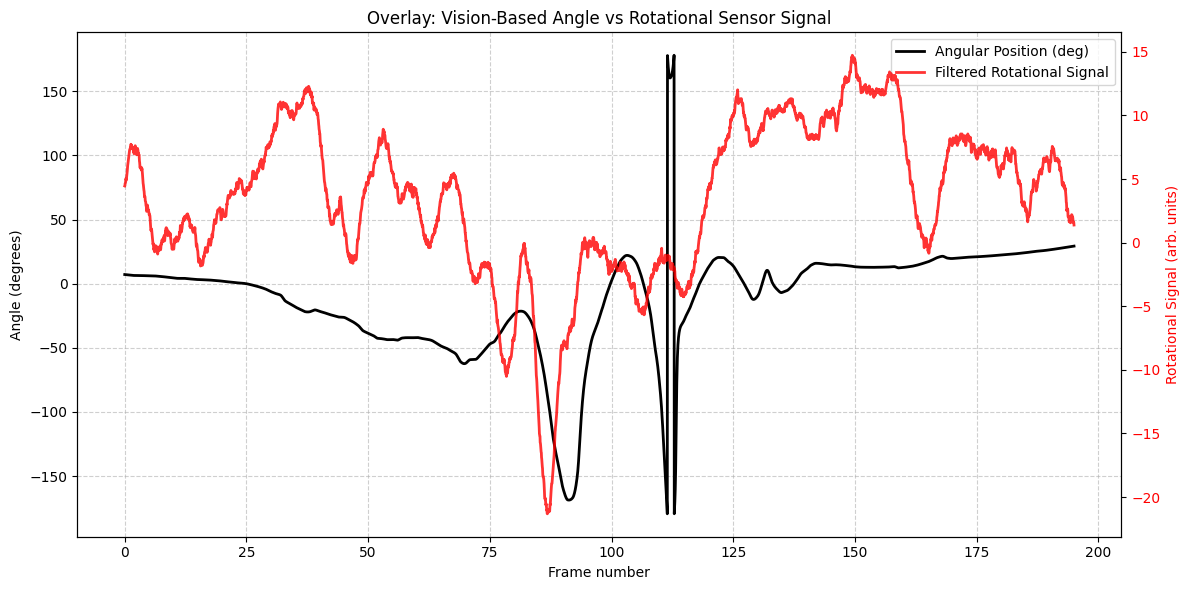

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED ANGLE DATA (from previous pipeline)
# ==========================================================
# CSV columns assumed:
# Frame, Nx, Ny, Angle_Deg

angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg = angle_data[:, 3]

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"

start, end = 600, 11514
kf = 40
kb = 40
window = kf + kb + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

samples = np.arange(len(data))

# Rotational proxy
rotational = data[:, 2] - data[:, 0]

# Moving mean (MATLAB-equivalent)
kernel = np.ones(window) / window
rotational_filt = np.convolve(rotational, kernel, mode="same")

# ==========================================================
# FRAME ALIGNMENT
# ==========================================================
# Assume rotational samples correspond to the same interpolated frame range
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg = angle_deg[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Angle (left axis) ---
ax1.plot(
    frames,
    angle_deg,
    color="black",
    linewidth=2,
    label="Angular Position (deg)"
)
ax1.set_xlabel("Frame number")
ax1.set_ylabel("Angle (degrees)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.grid(True, linestyle="--", alpha=0.6)

# --- Rotational proxy (right axis) ---
ax2 = ax1.twinx()
ax2.plot(
    frames,
    rotational_filt,
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Rotational Signal"
)
ax2.set_ylabel("Rotational Signal (arb. units)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# --- Legend handling ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper right",
    frameon=True
)

plt.title("Overlay: Vision-Based Angle vs Rotational Sensor Signal")
plt.tight_layout()
plt.show()


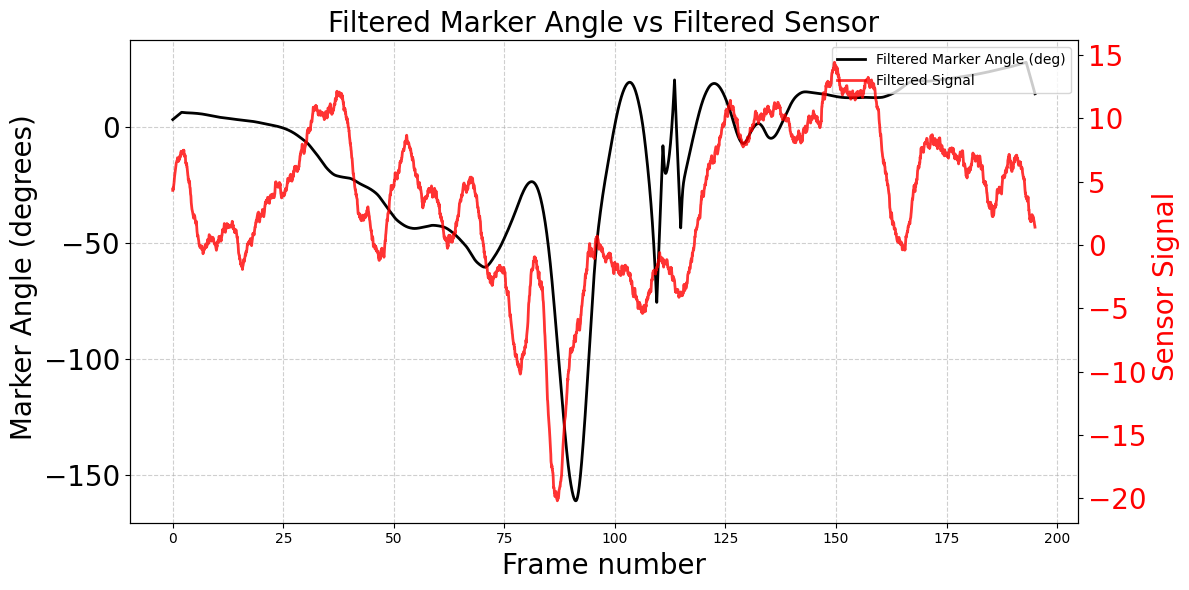

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
# CSV columns assumed:
# Frame, Nx, Ny, Angle_Deg

angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER (separate from sensor filter)
# ----------------------------------------------------------
kb_m = 50     # marker backward window
kf_m = 50     # marker forward window
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"

start, end = 600, 11514

kb_s = 45     # sensor backward window
kf_s = 45     # sensor forward window
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

# Rotational proxy
rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# FRAME ALIGNMENT
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Marker angle (left axis) ---
ax1.plot(
    frames,
    angle_deg_filt,
    color="black",
    linewidth=2,
    label="Filtered Marker Angle (deg)"
)
ax1.set_xlabel("Frame number",fontsize = 20)
ax1.set_ylabel(" Marker Angle (degrees)", color="black", fontsize = 20)
ax1.tick_params(axis="y", labelcolor="black", labelsize = 20)
ax1.grid(True, linestyle="--", alpha=0.6)

# --- Rotational sensor (right axis) ---
ax2 = ax1.twinx()
ax2.plot(
    frames,
    rotational_filt,
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Signal"
)
ax2.set_ylabel("Sensor Signal ", color="red", fontsize = 20)
ax2.tick_params(axis="y", labelcolor="red", labelsize =20)

# --- Legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize = 20)
plt.tight_layout()
plt.show()


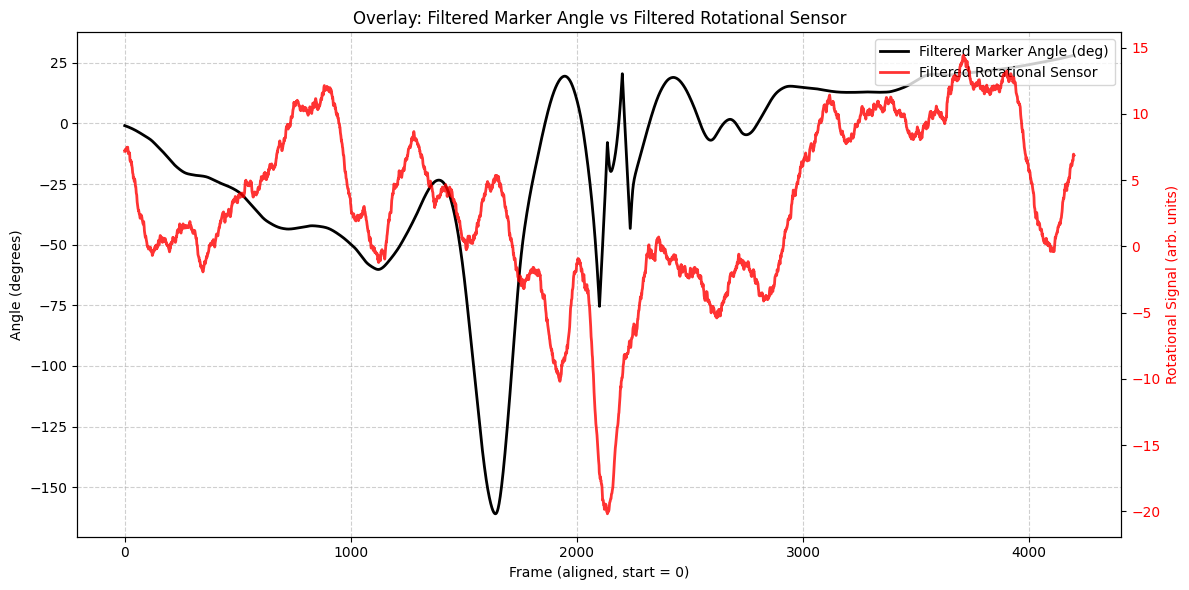

Final length: 4200


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# USER PARAMETERS
# ==========================================================

# --- Files ---
marker_file = "Marker_Angle_Frames_600Hz.csv"
sensor_file = "rotation_2.csv"

# --- Manual frame selection (RAW DATA INDEXING) ---
marker_start, marker_end = 600, 11514
sensor_start, sensor_end = 600, 11514

# --- Filter parameters (separate) ---
kb_m, kf_m = 50, 50   # marker filter
kb_s, kf_s = 45, 45   # sensor filter

# ==========================================================
# LOAD MARKER (VISION) DATA
# ==========================================================
marker_data = np.genfromtxt(
    marker_file,
    delimiter=",",
    skip_header=1
)

marker_frames = marker_data[:, 0]
angle_deg = marker_data[:, 3]

# Manual trimming (raw)
marker_frames = marker_frames[marker_start:marker_end]
angle_deg = angle_deg[marker_start:marker_end]

# ==========================================================
# LOAD SENSOR DATA
# ==========================================================
sensor_data = np.genfromtxt(
    sensor_file,
    delimiter=",",
    skip_header=1
)

sensor_data = sensor_data[sensor_start:sensor_end, :]

# Rotational proxy
rotational = sensor_data[:, 2] - sensor_data[:, 0]

# ==========================================================
# FILTERING (MOVING MEAN VIA CONVOLUTION)
# ==========================================================

# Marker filter
window_m = kb_m + kf_m + 1
kernel_m = np.ones(window_m) / window_m
angle_filt = np.convolve(angle_deg, kernel_m, mode="same")

# Sensor filter
window_s = kb_s + kf_s + 1
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational, kernel_s, mode="same")

# ==========================================================
# EDGE ARTIFACT REMOVAL (CRITICAL STEP)
# ==========================================================

# Trim by the largest half-window
pad = max(kb_m, kf_m, kb_s, kf_s)

angle_filt = angle_filt[pad:-pad]
rotational_filt = rotational_filt[pad:-pad]
marker_frames = marker_frames[pad:-pad]

# ==========================================================
# FINAL ALIGNMENT & X-AXIS RESET
# ==========================================================

# Ensure equal length (defensive)
min_len = min(len(angle_filt), len(rotational_filt))
angle_filt = angle_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# Reset x-axis to start at 0
frames = np.arange(min_len)

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS)
# ==========================================================

fig, ax1 = plt.subplots(figsize=(12, 6))

# Marker (left axis)
ax1.plot(
    frames,
    angle_filt,
    color="black",
    linewidth=2,
    label="Filtered Marker Angle (deg)"
)
ax1.set_xlabel("Frame (aligned, start = 0)")
ax1.set_ylabel("Angle (degrees)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.grid(True, linestyle="--", alpha=0.6)

# Sensor (right axis)
ax2 = ax1.twinx()
ax2.plot(
    frames,
    rotational_filt,
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Rotational Sensor"
)
ax2.set_ylabel("Rotational Signal (arb. units)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc="upper right",
    frameon=True
)

plt.title("Overlay: Filtered Marker Angle vs Filtered Rotational Sensor")
plt.tight_layout()
plt.show()

# ==========================================================
# SANITY CHECK
# ==========================================================
print("Final length:", len(frames))


ValueError: x and y must have same first dimension, but have shapes (4800,) and (10814,)

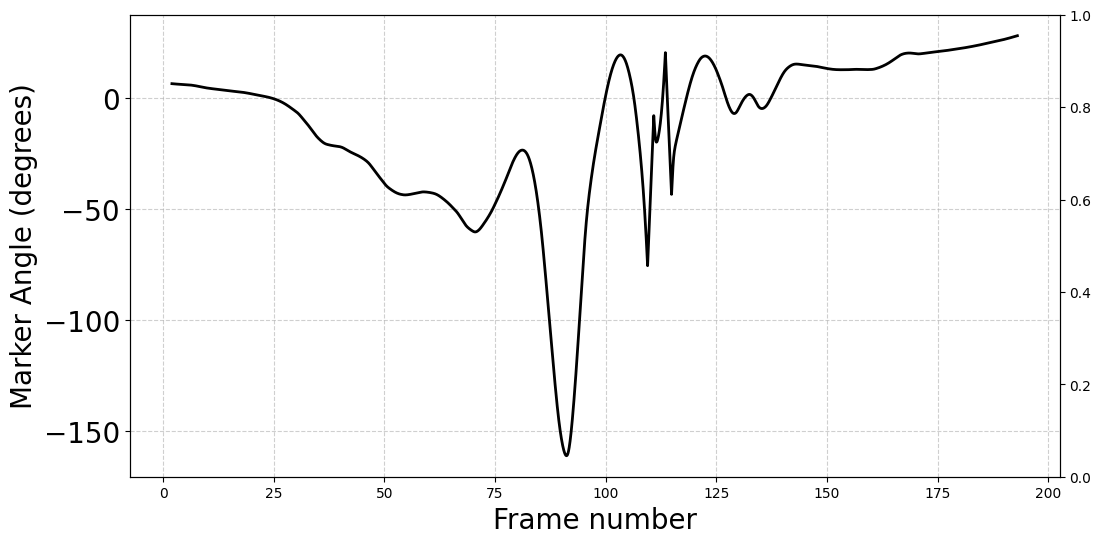

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50
kf_m = 50
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45
kf_s = 45
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# EDGE-TRIM TO REMOVE FILTER-INDUCED PADDING (NO TIME SHIFT)
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames_angle[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# OVERLAY PLOT
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(
    frames,
    angle_deg_filt,
    color="black",
    linewidth=2,
    label="Filtered Marker Angle (deg)"
)
ax1.set_xlabel("Frame number", fontsize=20)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.grid(True, linestyle="--", alpha=0.6)

ax2 = ax1.twinx()
ax2.plot(
    frames,
    rotational_filt,
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Signal"
)
ax2.set_ylabel("Sensor Signal", color="red", fontsize=20)
ax2.tick_params(axis="y", labelcolor="red", labelsize=20)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=20)
plt.tight_layout()
plt.show()


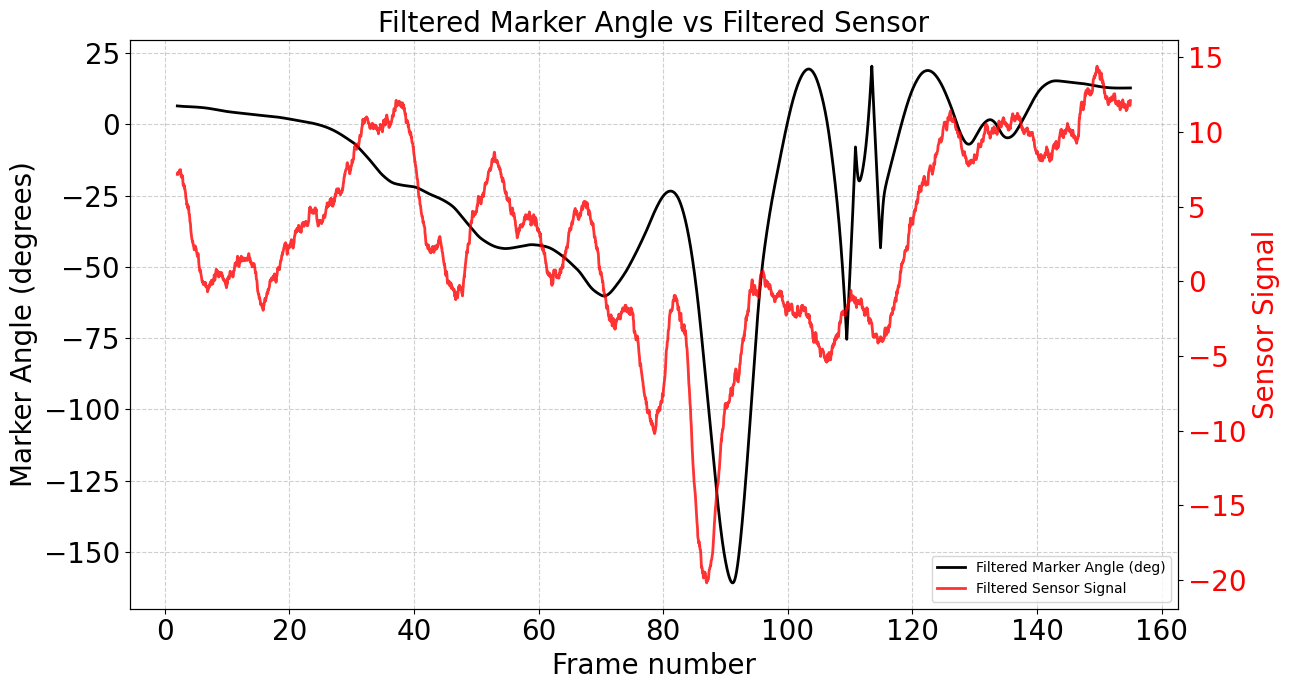

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
# CSV columns assumed:
# Frame, Nx, Ny, Angle_Deg
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50     # marker backward window
kf_m = 50     # marker forward window
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45     # sensor backward window
kf_s = 45     # sensor forward window
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

# Rotational proxy
rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT (NO TIME SHIFT)
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING (REMOVE FILTER-INDUCED PADDING ONLY)
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT SIGNALS AT SPECIFIED FRAME (GREEN LINE)
# ==========================================================
cut_frame = 155
cut_idx = np.searchsorted(frames, cut_frame)

frames = frames[:cut_idx]
angle_deg_filt = angle_deg_filt[:cut_idx]
rotational_filt = rotational_filt[:cut_idx]


# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(13, 7))

# --- Marker angle (left axis) ---
ax1.plot(
    frames,
    angle_deg_filt,
    color="black",
    linewidth=2,
    label="Filtered Marker Angle (deg)"
)
ax1.set_xlabel("Frame number", fontsize=20)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.tick_params(axis="x", labelsize=20)
# ax1.set_ylim(angle_deg_filt.min(), angle_deg_filt.max())


# --- Rotational sensor (right axis) ---
ax2 = ax1.twinx()
ax2.plot(
    frames,
    rotational_filt,
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Sensor Signal"
)
ax2.set_ylabel("Sensor Signal", color="red", fontsize=20)
ax2.tick_params(axis="y", labelcolor="red", labelsize=20)
# ax2.set_ylim(rotational_filt.min(), rotational_filt.max())


# --- Legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=20)
plt.tight_layout()
plt.show()


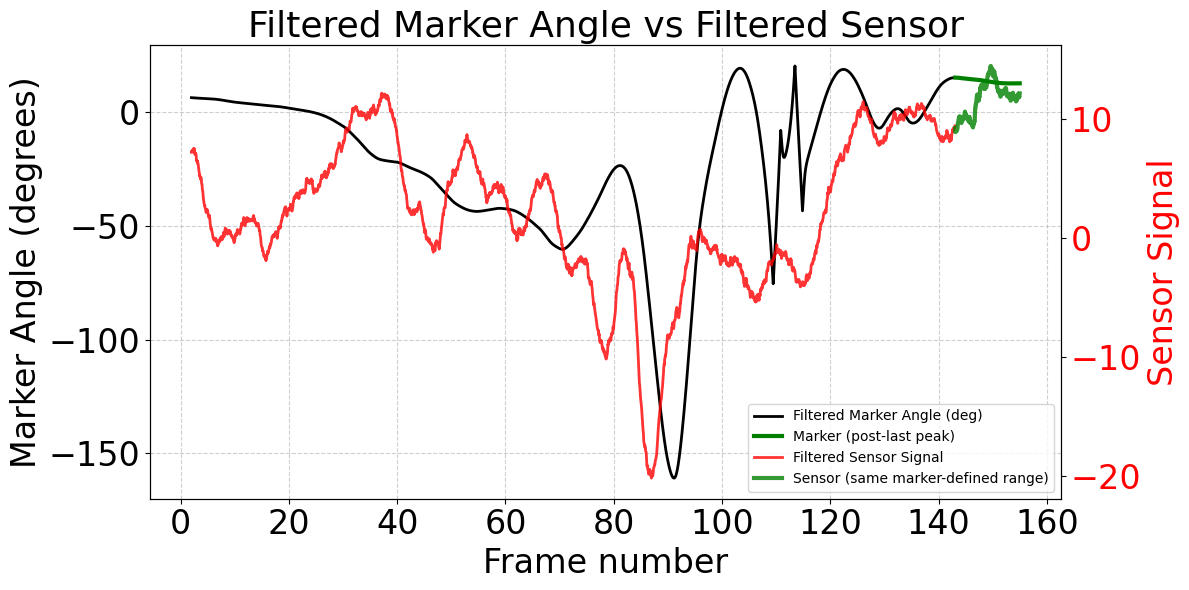

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
# CSV columns assumed:
# Frame, Nx, Ny, Angle_Deg
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50     # marker backward window
kf_m = 50     # marker forward window
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45     # sensor backward window
kf_s = 45     # sensor forward window
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

# Rotational proxy
rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT (NO TIME SHIFT)
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING (REMOVE FILTER-INDUCED PADDING ONLY)
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT SIGNALS AT SPECIFIED FRAME (GREEN LINE)
# ==========================================================
cut_frame = 155
cut_idx = np.searchsorted(frames, cut_frame)

frames = frames[:cut_idx]
angle_deg_filt = angle_deg_filt[:cut_idx]
rotational_filt = rotational_filt[:cut_idx]


# ==========================================================
# FIND LAST LOCAL MAXIMUM OF MARKER SIGNAL
# ==========================================================
dy = np.diff(angle_deg_filt)

# local maxima: slope changes from + to -
peak_indices = np.where((dy[:-1] > 0) & (dy[1:] < 0))[0] + 1

last_peak_idx = peak_indices[-1]   # last marker peak

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS)
# ==========================================================
# fig, ax1 = plt.subplots(figsize=(13, 7))

# # --- Marker angle (left axis) ---
# ax1.plot(
#     frames,
#     angle_deg_filt,
#     color="black",
#     linewidth=2,
#     label="Filtered Marker Angle (deg)"
# )
# ax1.set_xlabel("Frame number", fontsize=20)
# ax1.set_ylabel("Marker Angle (degrees)", fontsize=20)
# ax1.tick_params(axis="y", labelsize=20)
# ax1.grid(True, linestyle="--", alpha=0.6)
# ax1.tick_params(axis="x", labelsize=20)
# # ax1.set_ylim(angle_deg_filt.min(), angle_deg_filt.max())


# # --- Rotational sensor (right axis) ---
# ax2 = ax1.twinx()
# ax2.plot(
#     frames,
#     rotational_filt,
#     color="red",
#     linewidth=2,
#     alpha=0.8,
#     label="Filtered Sensor Signal"
# )
# ax2.set_ylabel("Sensor Signal", color="red", fontsize=20)
# ax2.tick_params(axis="y", labelcolor="red", labelsize=20)
# # ax2.set_ylim(rotational_filt.min(), rotational_filt.max())


# # --- Legend ---
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()

# ax1.legend(
#     lines_1 + lines_2,
#     labels_1 + labels_2,
#     loc="lower right",
#     frameon=True
# )

# plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=20)
# plt.tight_layout()
# plt.show()

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS WITH PEAK-BASED COLORING)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Marker angle ---
ax1.plot(
    frames[:last_peak_idx],
    angle_deg_filt[:last_peak_idx],
    color="black",
    linewidth=2,
    label="Filtered Marker Angle (deg)"
)

ax1.plot(
    frames[last_peak_idx:],
    angle_deg_filt[last_peak_idx:],
    color="green",
    linewidth=3,
    label="Marker (post-last peak)"
)

ax1.set_xlabel("Frame number", fontsize=24)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=24)
ax1.tick_params(axis="x", labelsize=24)
ax1.tick_params(axis="y", labelsize=24)
ax1.grid(True, linestyle="--", alpha=0.6)

# --- Sensor signal (uses SAME index range) ---
ax2 = ax1.twinx()

ax2.plot(
    frames[:last_peak_idx],
    rotational_filt[:last_peak_idx],
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Sensor Signal"
)

ax2.plot(
    frames[last_peak_idx:],
    rotational_filt[last_peak_idx:],
    color="green",
    linewidth=3,
    alpha=0.8,
    label="Sensor (same marker-defined range)"
)

ax2.set_ylabel("Sensor Signal", color="red", fontsize=24)
ax2.tick_params(axis="y", labelcolor="red", labelsize=24)

# --- Legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=26)
plt.tight_layout()
plt.show()



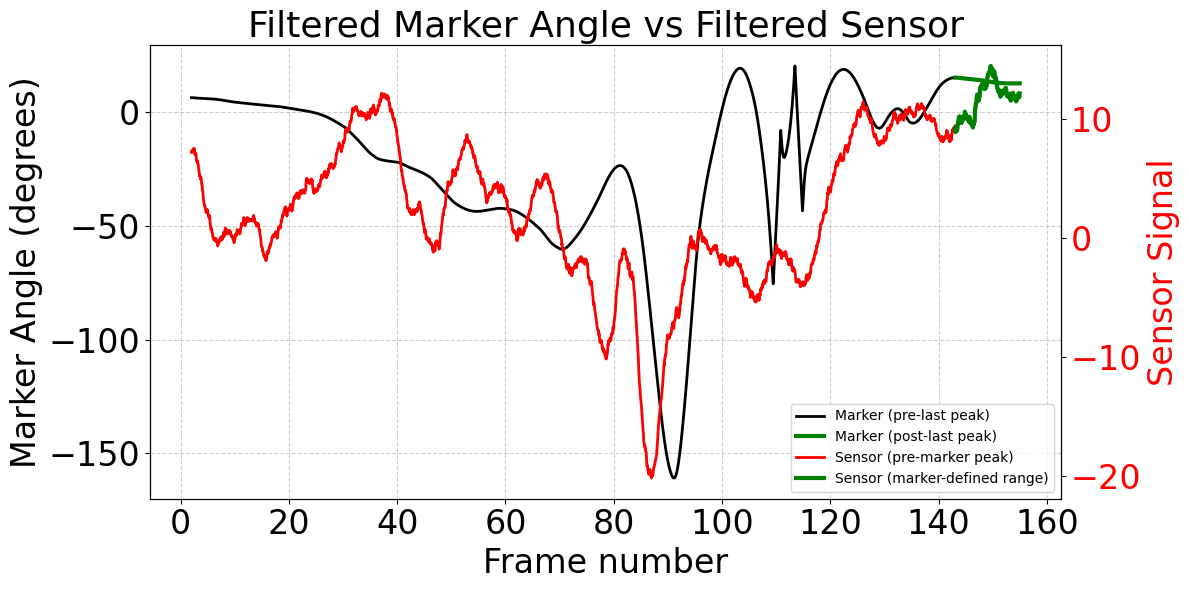

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
# CSV columns assumed:
# Frame, Nx, Ny, Angle_Deg
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50     # marker backward window
kf_m = 50     # marker forward window
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45     # sensor backward window
kf_s = 45     # sensor forward window
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

# Rotational proxy
rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT (NO TIME SHIFT)
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING (REMOVE FILTER-INDUCED PADDING ONLY)
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT SIGNALS AT SPECIFIED FRAME (GREEN LINE)
# ==========================================================
cut_frame = 155
cut_idx = np.searchsorted(frames, cut_frame)

frames = frames[:cut_idx]
angle_deg_filt = angle_deg_filt[:cut_idx]
rotational_filt = rotational_filt[:cut_idx]


# ==========================================================
# FIND LAST LOCAL MAXIMUM OF MARKER SIGNAL
# ==========================================================
# dy = np.diff(angle_deg_filt)

# # local maxima: slope changes from + to -
# peak_indices = np.where((dy[:-1] > 0) & (dy[1:] < 0))[0] + 1

# last_peak_idx = peak_indices[-1]   # last marker peak

# ==========================================================
# LAST PEAK (MAX) FROM MARKER ONLY
# ==========================================================
dy = np.diff(angle_deg_filt)

# Local maxima: slope changes from + to -
marker_peak_indices = np.where((dy[:-1] > 0) & (dy[1:] < 0))[0] + 1

last_peak_idx = marker_peak_indices[-1]   # <-- single index used for BOTH
last_peak_frame = frames[last_peak_idx]


# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS)
# ==========================================================
# fig, ax1 = plt.subplots(figsize=(13, 7))

# # --- Marker angle (left axis) ---
# ax1.plot(
#     frames,
#     angle_deg_filt,
#     color="black",
#     linewidth=2,
#     label="Filtered Marker Angle (deg)"
# )
# ax1.set_xlabel("Frame number", fontsize=20)
# ax1.set_ylabel("Marker Angle (degrees)", fontsize=20)
# ax1.tick_params(axis="y", labelsize=20)
# ax1.grid(True, linestyle="--", alpha=0.6)
# ax1.tick_params(axis="x", labelsize=20)
# # ax1.set_ylim(angle_deg_filt.min(), angle_deg_filt.max())


# # --- Rotational sensor (right axis) ---
# ax2 = ax1.twinx()
# ax2.plot(
#     frames,
#     rotational_filt,
#     color="red",
#     linewidth=2,
#     alpha=0.8,
#     label="Filtered Sensor Signal"
# )
# ax2.set_ylabel("Sensor Signal", color="red", fontsize=20)
# ax2.tick_params(axis="y", labelcolor="red", labelsize=20)
# # ax2.set_ylim(rotational_filt.min(), rotational_filt.max())


# # --- Legend ---
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()

# ax1.legend(
#     lines_1 + lines_2,
#     labels_1 + labels_2,
#     loc="lower right",
#     frameon=True
# )

# plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=20)
# plt.tight_layout()
# plt.show()

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS WITH PEAK-BASED COLORING)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Marker angle ---
# ax1.plot(
#     frames[:last_peak_idx],
#     angle_deg_filt[:last_peak_idx],
#     color="black",
#     linewidth=2,
#     label="Filtered Marker Angle (deg)"
# )

# ax1.plot(
#     frames[last_peak_idx:],
#     angle_deg_filt[last_peak_idx:],
#     color="green",
#     linewidth=3,
#     label="Marker (post-last peak)"
# )

# ax1.set_xlabel("Frame number", fontsize=24)
# ax1.set_ylabel("Marker Angle (degrees)", fontsize=24)
# ax1.tick_params(axis="x", labelsize=24)
# ax1.tick_params(axis="y", labelsize=24)
# ax1.grid(True, linestyle="--", alpha=0.6)

ax1.plot(
    frames[:last_peak_idx],
    angle_deg_filt[:last_peak_idx],
    color="black",
    linewidth=2,
    label="Marker (pre-last peak)"
)

ax1.plot(
    frames[last_peak_idx:],
    angle_deg_filt[last_peak_idx:],
    color="green",
    linewidth=3,
    label="Marker (post-last peak)"
)

ax1.set_xlabel("Frame number", fontsize=24)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=24)
ax1.tick_params(axis="x", labelsize=24)
ax1.tick_params(axis="y", labelsize=24)
ax1.grid(True, linestyle="--", alpha=0.6)

# --- Sensor signal (uses SAME index range) ---
ax2 = ax1.twinx()

# ax2.plot(
#     frames[:last_peak_idx],
#     rotational_filt[:last_peak_idx],
#     color="red",
#     linewidth=2,
#     alpha=0.8,
#     label="Filtered Sensor Signal"
# )

# ax2.plot(
#     frames[last_peak_idx:],
#     rotational_filt[last_peak_idx:],
#     color="green",
#     linewidth=3,
#     alpha=0.8,
#     label="Sensor (same marker-defined range)"
# )
ax2.plot(
    frames[:last_peak_idx],
    rotational_filt[:last_peak_idx],
    color="red",
    linewidth=2,
    label="Sensor (pre-marker peak)"
)

ax2.plot(
    frames[last_peak_idx:],
    rotational_filt[last_peak_idx:],
    color="green",
    linewidth=3,
    label="Sensor (marker-defined range)"
)

ax2.set_ylabel("Sensor Signal", color="red", fontsize=24)
ax2.tick_params(axis="y", labelcolor="red", labelsize=24)

# --- Legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# ax1.axvline(
#     last_peak_frame,
#     color="green",
#     linestyle="--",
#     linewidth=2,
#     alpha=0.8
# )

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=26)
plt.tight_layout()
plt.show()



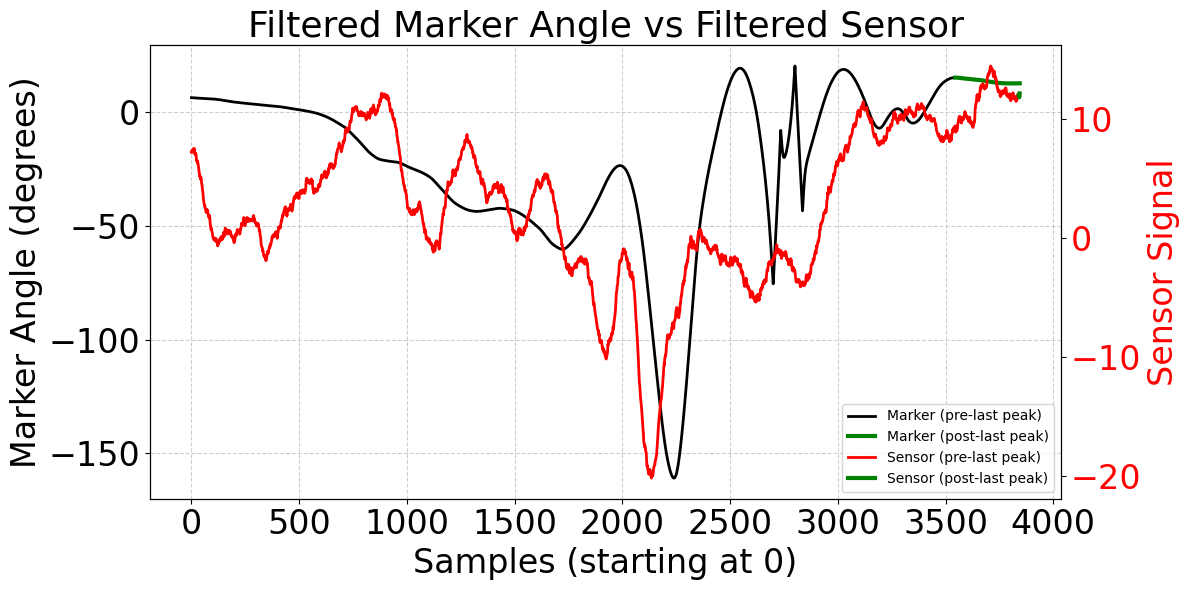

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
# CSV columns assumed:
# Frame, Nx, Ny, Angle_Deg
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50
kf_m = 50
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45
kf_s = 45
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

# Rotational proxy
rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT (NO TIME SHIFT)
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING (REMOVE FILTER-INDUCED PADDING ONLY)
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT SIGNALS AT SPECIFIED FRAME
# ==========================================================
cut_frame = 155
cut_idx = np.searchsorted(frames, cut_frame)

frames = frames[:cut_idx]
angle_deg_filt = angle_deg_filt[:cut_idx]
rotational_filt = rotational_filt[:cut_idx]

# ==========================================================
# RESET X-AXIS TO START FROM 0
# ==========================================================
x = np.arange(len(frames))

# ==========================================================
# FIND LAST LOCAL MAXIMUM — MARKER
# ==========================================================
dy_m = np.diff(angle_deg_filt)
marker_peak_indices = np.where((dy_m[:-1] > 0) & (dy_m[1:] < 0))[0] + 1
last_marker_peak_idx = marker_peak_indices[-1]

# ==========================================================
# FIND LAST LOCAL MAXIMUM — SENSOR
# ==========================================================
dy_s = np.diff(rotational_filt)
sensor_peak_indices = np.where((dy_s[:-1] > 0) & (dy_s[1:] < 0))[0] + 1
last_sensor_peak_idx = sensor_peak_indices[-1]

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS WITH INDEPENDENT PEAK SPLITS)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# ---------------- Marker (left axis) ----------------
ax1.plot(
    x[:last_marker_peak_idx],
    angle_deg_filt[:last_marker_peak_idx],
    color="black",
    linewidth=2,
    label="Marker (pre-last peak)"
)

ax1.plot(
    x[last_marker_peak_idx:],
    angle_deg_filt[last_marker_peak_idx:],
    color="green",
    linewidth=3,
    label="Marker (post-last peak)"
)

ax1.set_xlabel("Samples (starting at 0)", fontsize=24)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=24)
ax1.tick_params(axis="x", labelsize=24)
ax1.tick_params(axis="y", labelsize=24)
ax1.grid(True, linestyle="--", alpha=0.6)

# ---------------- Sensor (right axis) ----------------
ax2 = ax1.twinx()

ax2.plot(
    x[:last_sensor_peak_idx],
    rotational_filt[:last_sensor_peak_idx],
    color="red",
    linewidth=2,
    label="Sensor (pre-last peak)"
)

ax2.plot(
    x[last_sensor_peak_idx:],
    rotational_filt[last_sensor_peak_idx:],
    color="green",
    linewidth=3,
    label="Sensor (post-last peak)"
)

ax2.set_ylabel("Sensor Signal", color="red", fontsize=24)
ax2.tick_params(axis="y", labelcolor="red", labelsize=24)

# ---------------- Legend ----------------
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=26)
plt.tight_layout()
plt.show()


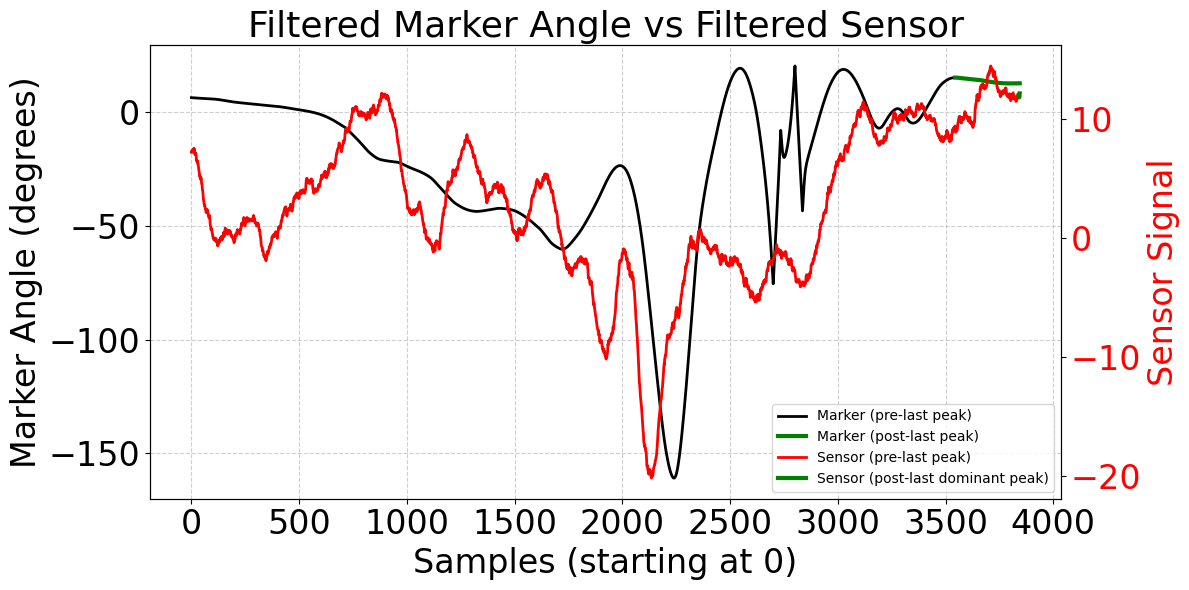

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50
kf_m = 50
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45
kf_s = 45
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

# Rotational proxy
rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT (NO TIME SHIFT)
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING (REMOVE FILTER-INDUCED PADDING ONLY)
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT SIGNALS AT SPECIFIED FRAME
# ==========================================================
cut_frame = 155
cut_idx = np.searchsorted(frames, cut_frame)

frames = frames[:cut_idx]
angle_deg_filt = angle_deg_filt[:cut_idx]
rotational_filt = rotational_filt[:cut_idx]

# ==========================================================
# RESET X-AXIS TO START FROM 0
# ==========================================================
x = np.arange(len(frames))   # sample index starting at 0

# ==========================================================
# LAST LOCAL MAXIMUM — MARKER (slope-based is sufficient)
# ==========================================================
dy_m = np.diff(angle_deg_filt)
marker_peaks = np.where((dy_m[:-1] > 0) & (dy_m[1:] < 0))[0] + 1
last_marker_peak_idx = marker_peaks[-1]

# ==========================================================
# LAST DOMINANT MAXIMUM — SENSOR (amplitude-filtered)
# ==========================================================
dy_s = np.diff(rotational_filt)
sensor_peaks = np.where((dy_s[:-1] > 0) & (dy_s[1:] < 0))[0] + 1

# Keep only dominant peaks (reject noise)
peak_values = rotational_filt[sensor_peaks]
dominance_threshold = 0.8 * np.max(peak_values)

dominant_peaks = sensor_peaks[peak_values >= dominance_threshold]
last_sensor_peak_idx = dominant_peaks[-1]

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS WITH CORRECT PEAK SPLITS)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# ---------------- Marker ----------------
ax1.plot(
    x[:last_marker_peak_idx],
    angle_deg_filt[:last_marker_peak_idx],
    color="black",
    linewidth=2,
    label="Marker (pre-last peak)"
)

ax1.plot(
    x[last_marker_peak_idx:],
    angle_deg_filt[last_marker_peak_idx:],
    color="green",
    linewidth=3,
    label="Marker (post-last peak)"
)

ax1.set_xlabel("Samples (starting at 0)", fontsize=24)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=24)
ax1.tick_params(axis="x", labelsize=24)
ax1.tick_params(axis="y", labelsize=24)
ax1.grid(True, linestyle="--", alpha=0.6)

# ---------------- Sensor ----------------
ax2 = ax1.twinx()

ax2.plot(
    x[:last_sensor_peak_idx],
    rotational_filt[:last_sensor_peak_idx],
    color="red",
    linewidth=2,
    label="Sensor (pre-last peak)"
)

ax2.plot(
    x[last_sensor_peak_idx:],
    rotational_filt[last_sensor_peak_idx:],
    color="green",
    linewidth=3,
    label="Sensor (post-last dominant peak)"
)

ax2.set_ylabel("Sensor Signal", color="red", fontsize=24)
ax2.tick_params(axis="y", labelcolor="red", labelsize=24)

# ---------------- Legend ----------------
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=26)
plt.tight_layout()
plt.show()


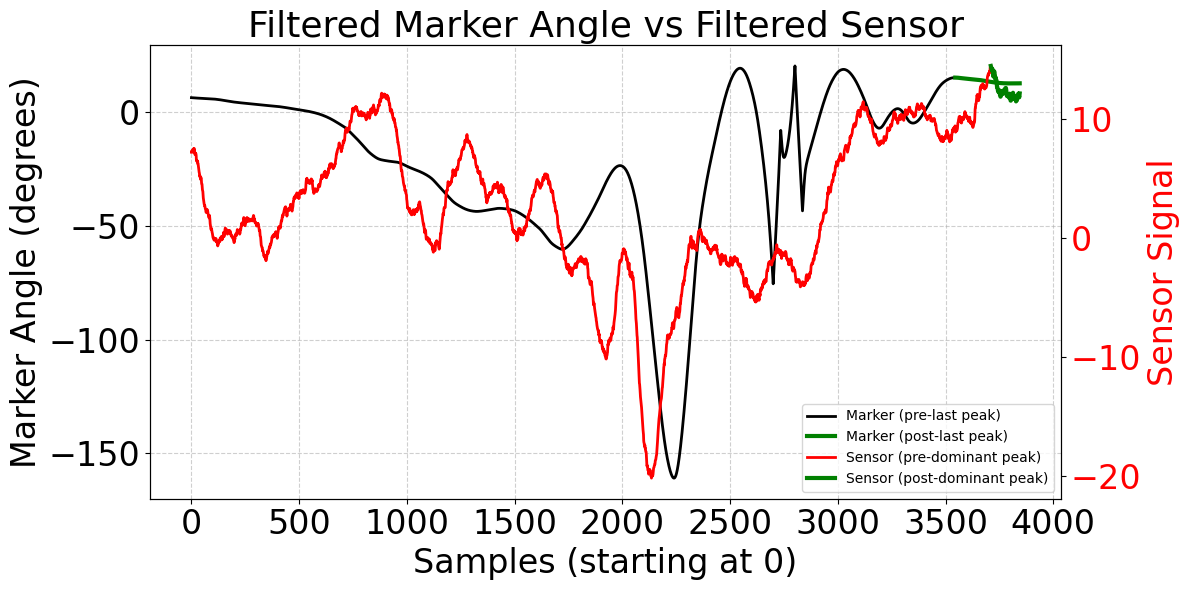

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50
kf_m = 50
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45
kf_s = 45
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT SIGNALS AT SPECIFIED FRAME
# ==========================================================
cut_frame = 155
cut_idx = np.searchsorted(frames, cut_frame)

frames = frames[:cut_idx]
angle_deg_filt = angle_deg_filt[:cut_idx]
rotational_filt = rotational_filt[:cut_idx]

# ==========================================================
# RESET X-AXIS TO START FROM 0
# ==========================================================
x = np.arange(len(frames))

# ==========================================================
# MARKER LAST PEAK (UNCHANGED)
# ==========================================================
dy_m = np.diff(angle_deg_filt)
marker_peaks = np.where((dy_m[:-1] > 0) & (dy_m[1:] < 0))[0] + 1
last_marker_peak_idx = marker_peaks[-1]

# ==========================================================
# SENSOR DOMINANT PEAK FROM SAMPLE 3500 → END
# ==========================================================
search_start = 3500

# Safety check
search_start = min(search_start, len(rotational_filt) - 1)

# Restrict search window
sensor_tail = rotational_filt[search_start:]

# Dominant (global) max in this region
tail_max_idx_local = np.argmax(sensor_tail)
last_sensor_peak_idx = search_start + tail_max_idx_local

# ==========================================================
# OVERLAY PLOT
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# ---------------- Marker ----------------
ax1.plot(
    x[:last_marker_peak_idx],
    angle_deg_filt[:last_marker_peak_idx],
    color="black",
    linewidth=2,
    label="Marker (pre-last peak)"
)

ax1.plot(
    x[last_marker_peak_idx:],
    angle_deg_filt[last_marker_peak_idx:],
    color="green",
    linewidth=3,
    label="Marker (post-last peak)"
)

ax1.set_xlabel("Samples (starting at 0)", fontsize=24)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=24)
ax1.tick_params(axis="x", labelsize=24)
ax1.tick_params(axis="y", labelsize=24)
ax1.grid(True, linestyle="--", alpha=0.6)

# ---------------- Sensor ----------------
ax2 = ax1.twinx()

ax2.plot(
    x[:last_sensor_peak_idx],
    rotational_filt[:last_sensor_peak_idx],
    color="red",
    linewidth=2,
    label="Sensor (pre-dominant peak)"
)

ax2.plot(
    x[last_sensor_peak_idx:],
    rotational_filt[last_sensor_peak_idx:],
    color="green",
    linewidth=3,
    label="Sensor (post-dominant peak)"
)

ax2.set_ylabel("Sensor Signal", color="red", fontsize=24)
ax2.tick_params(axis="y", labelcolor="red", labelsize=24)

# ---------------- Legend ----------------
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=26)
plt.tight_layout()
plt.show()


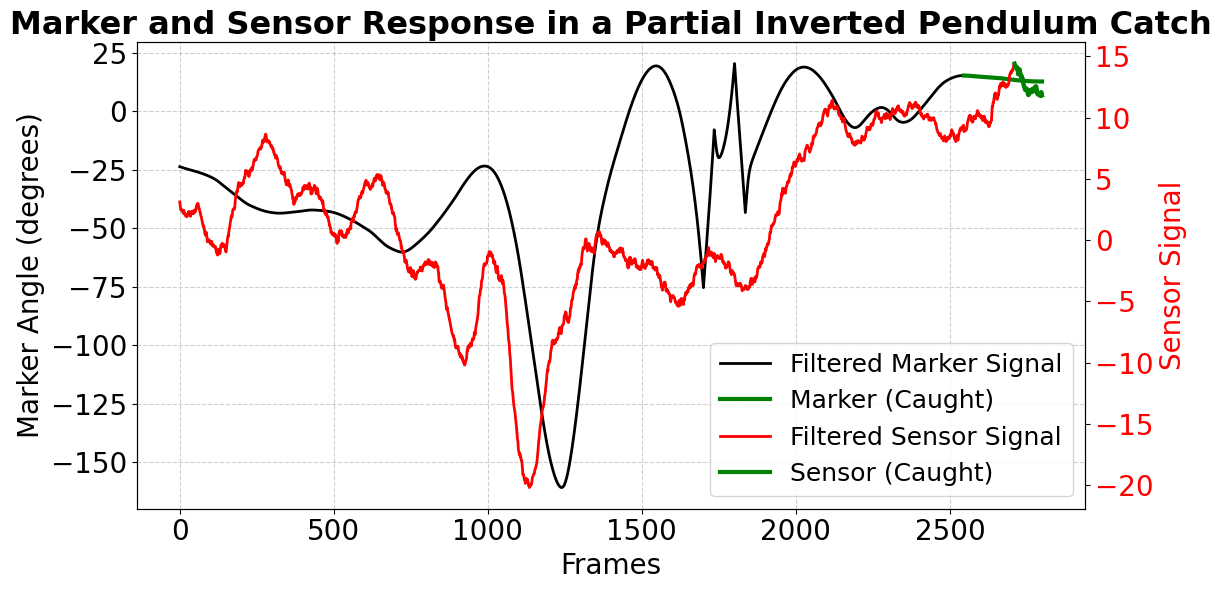

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50
kf_m = 50
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45
kf_s = 45
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT BOTH SIGNALS TO START AT SPECIFIED INDEX
# ==========================================================
cut_start_index = 1000  # Assuming 'start_frame' was meant as an index here

# Ensure the cut_start_index is not out of bounds
if cut_start_index >= len(frames):
    cut_start_index = 0  # Default to start if out of bounds

frames = frames[cut_start_index:]
angle_deg_filt = angle_deg_filt[cut_start_index:]
rotational_filt = rotational_filt[cut_start_index:]

# ==========================================================
# CUT BOTH SIGNALS AT END INDEX 3000
# ==========================================================
cut_end_index = 2800
cut_end_index = min(cut_end_index, len(frames))

frames = frames[:cut_end_index]
angle_deg_filt = angle_deg_filt[:cut_end_index]
rotational_filt = rotational_filt[:cut_end_index]

# ==========================================================
# RESET X-AXIS TO START FROM 0
# ==========================================================
x = np.arange(len(frames))   # sample index starting at 0

# ==========================================================
# MARKER LAST PEAK
# ==========================================================
dy_m = np.diff(angle_deg_filt)
marker_peaks = np.where((dy_m[:-1] > 0) & (dy_m[1:] < 0))[0] + 1

if len(marker_peaks) == 0:
    last_marker_peak_idx = 0  # Default to start if no peaks
else:
    last_marker_peak_idx = marker_peaks[-1]

# ==========================================================
# SENSOR DOMINANT PEAK FROM SAMPLE 1000 → END
# ==========================================================
search_start = 1000
search_start = min(search_start, len(rotational_filt) - 1)

sensor_tail = rotational_filt[search_start:]

if len(sensor_tail) <= 1:
    last_sensor_peak_idx = search_start
else:
    last_sensor_peak_idx = search_start + np.argmax(sensor_tail)

# ==========================================================
# OVERLAY PLOT
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# ---------------- Marker ----------------
ax1.plot(
    x[:last_marker_peak_idx],
    angle_deg_filt[:last_marker_peak_idx],
    color="black",
    linewidth=2,
    label="Filtered Marker Signal"
)

ax1.plot(
    x[last_marker_peak_idx:],
    angle_deg_filt[last_marker_peak_idx:],
    color="green",
    linewidth=3,
    label="Marker (Caught)"
)

ax1.set_xlabel("Frames", fontsize=20)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=20)
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
ax1.grid(True, linestyle="--", alpha=0.6)

# ---------------- Sensor ----------------
ax2 = ax1.twinx()

ax2.plot(
    x[:last_sensor_peak_idx],
    rotational_filt[:last_sensor_peak_idx],
    color="red",
    linewidth=2,
    label="Filtered Sensor Signal"
)

ax2.plot(
    x[last_sensor_peak_idx:],
    rotational_filt[last_sensor_peak_idx:],
    color="green",
    linewidth=3,
    label="Sensor (Caught)"
)

ax2.set_ylabel("Sensor Signal", color="red", fontsize=20)
ax2.tick_params(axis="y", labelcolor="red", labelsize=20)

# ---------------- Legend ----------------
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True,
    fontsize=18
)

plt.title("Marker and Sensor Response in a Partial Inverted Pendulum Catch", fontsize=23,fontweight='bold')
plt.tight_layout()
plt.show()


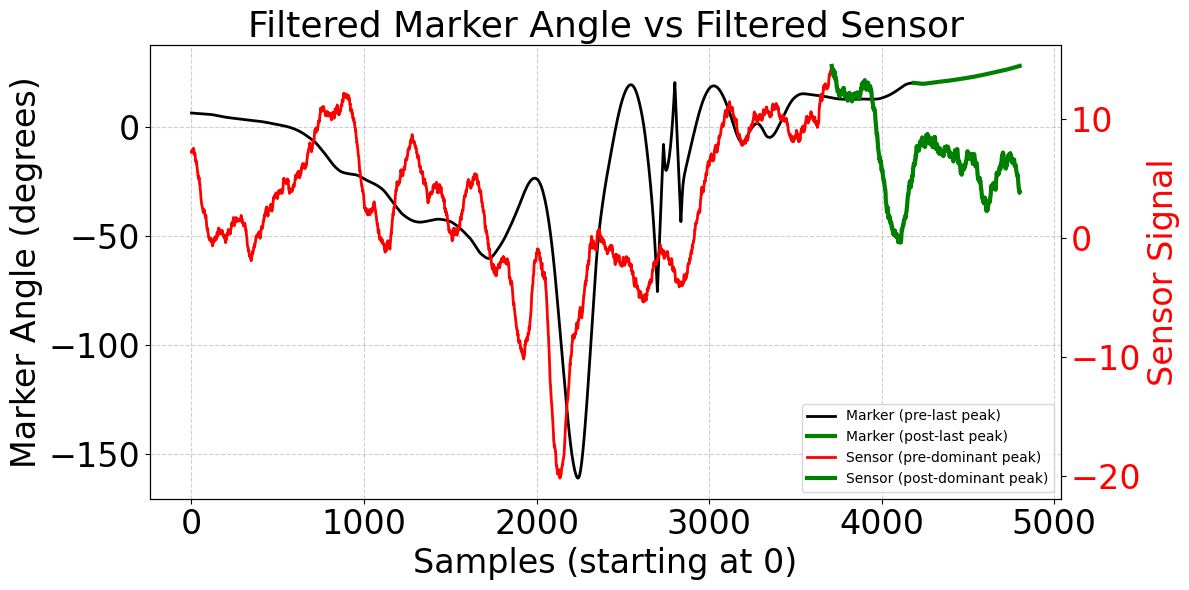

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50
kf_m = 50
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45
kf_s = 45
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT BOTH SIGNALS AT FRAME 3000 (END CUT)
# ==========================================================
end_frame = 3000

end_idx = np.searchsorted(frames, end_frame, side="right")

frames = frames[:end_idx]
angle_deg_filt = angle_deg_filt[:end_idx]
rotational_filt = rotational_filt[:end_idx]

# ==========================================================
# RESET X-AXIS TO START FROM 0
# ==========================================================
x = np.arange(len(frames))

# ==========================================================
# MARKER LAST PEAK
# ==========================================================
dy_m = np.diff(angle_deg_filt)
marker_peaks = np.where((dy_m[:-1] > 0) & (dy_m[1:] < 0))[0] + 1

if len(marker_peaks) == 0:
    last_marker_peak_idx = 0
else:
    last_marker_peak_idx = marker_peaks[-1]

# ==========================================================
# SENSOR DOMINANT PEAK FROM SAMPLE 3500 → END
# ==========================================================
search_start = 1000
search_start = min(search_start, len(rotational_filt) - 1)

sensor_tail = rotational_filt[search_start:]

if len(sensor_tail) <= 1:
    last_sensor_peak_idx = search_start
else:
    last_sensor_peak_idx = search_start + np.argmax(sensor_tail)

# ==========================================================
# OVERLAY PLOT
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# ---------------- Marker ----------------
ax1.plot(
    x[:last_marker_peak_idx],
    angle_deg_filt[:last_marker_peak_idx],
    color="black",
    linewidth=2,
    label="Marker (pre-last peak)"
)

ax1.plot(
    x[last_marker_peak_idx:],
    angle_deg_filt[last_marker_peak_idx:],
    color="green",
    linewidth=3,
    label="Marker (post-last peak)"
)

ax1.set_xlabel("Samples (starting at 0)", fontsize=24)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=24)
ax1.tick_params(axis="x", labelsize=24)
ax1.tick_params(axis="y", labelsize=24)
ax1.grid(True, linestyle="--", alpha=0.6)

# ---------------- Sensor ----------------
ax2 = ax1.twinx()

ax2.plot(
    x[:last_sensor_peak_idx],
    rotational_filt[:last_sensor_peak_idx],
    color="red",
    linewidth=2,
    label="Sensor (pre-dominant peak)"
)

ax2.plot(
    x[last_sensor_peak_idx:],
    rotational_filt[last_sensor_peak_idx:],
    color="green",
    linewidth=3,
    label="Sensor (post-dominant peak)"
)

ax2.set_ylabel("Sensor Signal", color="red", fontsize=24)
ax2.tick_params(axis="y", labelcolor="red", labelsize=24)

# ---------------- Legend ----------------
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=26)
plt.tight_layout()
plt.show()


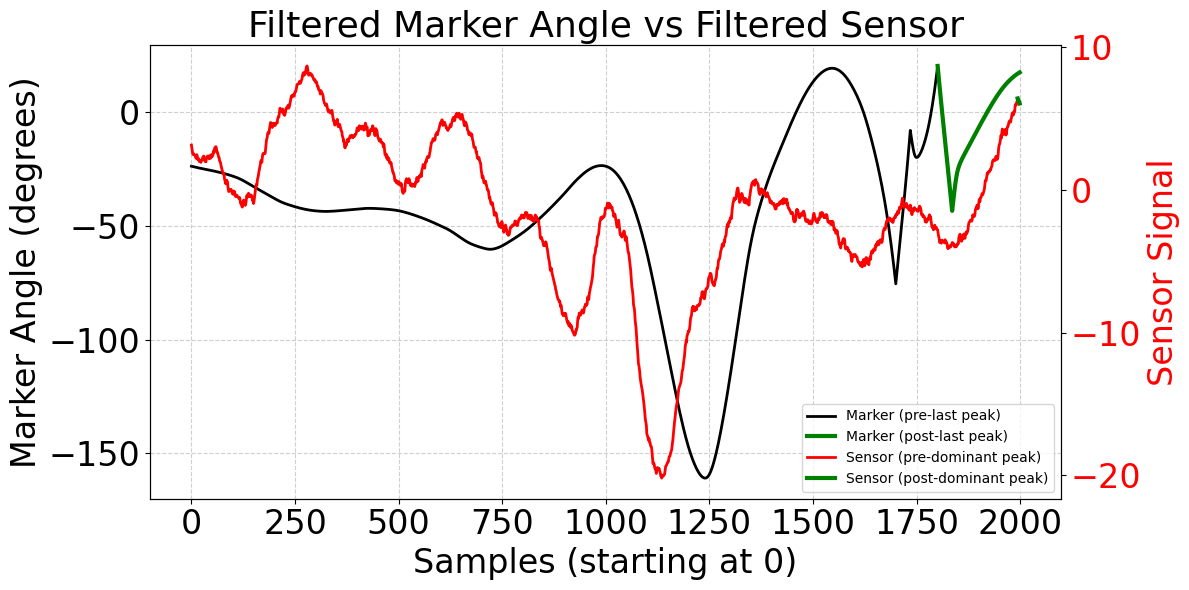

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50
kf_m = 50
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45
kf_s = 45
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING (FILTER PADDING ONLY)
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT BY INDEX RANGE (START AND END)
# ==========================================================
# The variables `start_frame` and `end_frame` are interpreted as indices for cutting.
cut_start_index = 1000   # user-defined start index
cut_end_index   = 3000   # user-defined end index

# Safety guards
cut_start_index = max(cut_start_index, 0)
cut_end_index   = min(cut_end_index, len(frames))

# Apply cuts
frames = frames[cut_start_index:cut_end_index]
angle_deg_filt = angle_deg_filt[cut_start_index:cut_end_index]
rotational_filt = rotational_filt[cut_start_index:cut_end_index]

# ==========================================================
# RESET X-AXIS TO START FROM 0
# ==========================================================
x = np.arange(len(frames))

# ==========================================================
# MARKER LAST PEAK (ROBUST)
# ==========================================================
dy_m = np.diff(angle_deg_filt)
marker_peaks = np.where((dy_m[:-1] > 0) & (dy_m[1:] < 0))[0] + 1

if marker_peaks.size > 0:
    last_marker_peak_idx = marker_peaks[-1]
else:
    # If no peaks are found, or the array is empty, default to 0
    # This handles the case where angle_deg_filt itself might be empty
    last_marker_peak_idx = 0

# ==========================================================}
# SENSOR DOMINANT PEAK (SEARCH IN TAIL REGION)
# ==========================================================
search_start = min(1000, len(rotational_filt) - 1)
sensor_tail = rotational_filt[search_start:]

# Ensure sensor_tail is not empty or single element before argmax
if len(sensor_tail) > 1:
    last_sensor_peak_idx = search_start + np.argmax(sensor_tail)
else:
    last_sensor_peak_idx = 0 # Default if no valid tail or peak can be found

# ==========================================================
# OVERLAY PLOT
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# ---------------- Marker ----------------
ax1.plot(
    x[:last_marker_peak_idx],
    angle_deg_filt[:last_marker_peak_idx],
    color="black",
    linewidth=2,
    label="Marker (pre-last peak)"
)

ax1.plot(
    x[last_marker_peak_idx:],
    angle_deg_filt[last_marker_peak_idx:],
    color="green",
    linewidth=3,
    label="Marker (post-last peak)"
)

ax1.set_xlabel("Samples (starting at 0)", fontsize=24)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=24)
ax1.tick_params(axis="x", labelsize=24)
ax1.tick_params(axis="y", labelsize=24)
ax1.grid(True, linestyle="--", alpha=0.6)

# ---------------- Sensor ----------------
ax2 = ax1.twinx()

ax2.plot(
    x[:last_sensor_peak_idx],
    rotational_filt[:last_sensor_peak_idx],
    color="red",
    linewidth=2,
    label="Sensor (pre-dominant peak)"
)

ax2.plot(
    x[last_sensor_peak_idx:],
    rotational_filt[last_sensor_peak_idx:],
    color="green",
    linewidth=3,
    label="Sensor (post-dominant peak)"
)

ax2.set_ylabel("Sensor Signal", color="red", fontsize=24)
ax2.tick_params(axis="y", labelcolor="red", labelsize=24)

# ---------------- Legend ----------------
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=26)
plt.tight_layout()
plt.show()

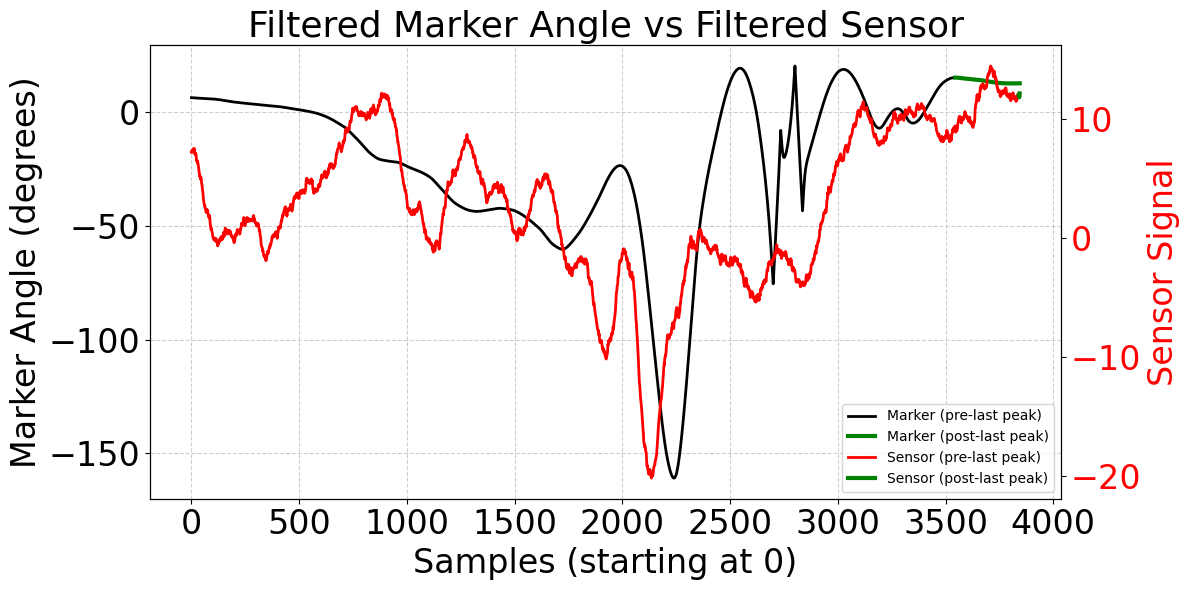

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LOAD INTERPOLATED MARKER ANGLE DATA
# ==========================================================
# CSV columns assumed:
# Frame, Nx, Ny, Angle_Deg
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# MARKER FILTER
# ----------------------------------------------------------
kb_m = 50     # marker backward window
kf_m = 50     # marker forward window
window_m = kb_m + kf_m + 1

kernel_m = np.ones(window_m) / window_m
angle_deg_filt = np.convolve(angle_deg_raw, kernel_m, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"
start, end = 600, 11514

kb_s = 45     # sensor backward window
kf_s = 45     # sensor forward window
window_s = kb_s + kf_s + 1

data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

# Rotational proxy
rotational_raw = data[:, 2] - data[:, 0]

# ----------------------------------------------------------
# SENSOR FILTER
# ----------------------------------------------------------
kernel_s = np.ones(window_s) / window_s
rotational_filt = np.convolve(rotational_raw, kernel_s, mode="same")

# ==========================================================
# HARD FRAME ALIGNMENT (NO TIME SHIFT)
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# EDGE TRIMMING (REMOVE FILTER-INDUCED PADDING ONLY)
# ==========================================================
trim_left  = max(kb_m, kb_s)
trim_right = max(kf_m, kf_s)

frames = frames[trim_left:-trim_right]
angle_deg_filt = angle_deg_filt[trim_left:-trim_right]
rotational_filt = rotational_filt[trim_left:-trim_right]

# ==========================================================
# CUT SIGNALS AT SPECIFIED FRAME (GREEN LINE)
# ==========================================================
cut_frame = 155
cut_idx = np.searchsorted(frames, cut_frame)

frames = frames[:cut_idx]
angle_deg_filt = angle_deg_filt[:cut_idx]
rotational_filt = rotational_filt[:cut_idx]

# ==========================================================
# RESET X-AXIS TO START FROM 0
# ==========================================================
x = np.arange(len(frames))   # 0, 1, 2, ...

# ==========================================================
# FIND LAST LOCAL MAXIMUM OF MARKER SIGNAL
# ==========================================================
dy_m = np.diff(angle_deg_filt)

marker_peak_indices = np.where((dy_m[:-1] > 0) & (dy_m[1:] < 0))[0] + 1
last_marker_peak_idx = marker_peak_indices[-1]

# ==========================================================
# FIND LAST LOCAL MAXIMUM OF SENSOR SIGNAL
# ==========================================================
dy_s = np.diff(rotational_filt)

sensor_peak_indices = np.where((dy_s[:-1] > 0) & (dy_s[1:] < 0))[0] + 1
last_sensor_peak_idx = sensor_peak_indices[-1]

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS WITH INDEPENDENT PEAK COLORING)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Marker angle (left axis) ---
ax1.plot(
    x[:last_marker_peak_idx],
    angle_deg_filt[:last_marker_peak_idx],
    color="black",
    linewidth=2,
    label="Marker (pre-last peak)"
)

ax1.plot(
    x[last_marker_peak_idx:],
    angle_deg_filt[last_marker_peak_idx:],
    color="green",
    linewidth=3,
    label="Marker (post-last peak)"
)

ax1.set_xlabel("Samples (starting at 0)", fontsize=24)
ax1.set_ylabel("Marker Angle (degrees)", fontsize=24)
ax1.tick_params(axis="x", labelsize=24)
ax1.tick_params(axis="y", labelsize=24)
ax1.grid(True, linestyle="--", alpha=0.6)

# --- Sensor signal (right axis) ---
ax2 = ax1.twinx()

ax2.plot(
    x[:last_sensor_peak_idx],
    rotational_filt[:last_sensor_peak_idx],
    color="red",
    linewidth=2,
    label="Sensor (pre-last peak)"
)

ax2.plot(
    x[last_sensor_peak_idx:],
    rotational_filt[last_sensor_peak_idx:],
    color="green",
    linewidth=3,
    label="Sensor (post-last peak)"
)

ax2.set_ylabel("Sensor Signal", color="red", fontsize=24)
ax2.tick_params(axis="y", labelcolor="red", labelsize=24)

# ==========================================================
# LEGEND
# ==========================================================
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="lower right",
    frameon=True
)

plt.title("Filtered Marker Angle vs Filtered Sensor", fontsize=26)
plt.tight_layout()
plt.show()


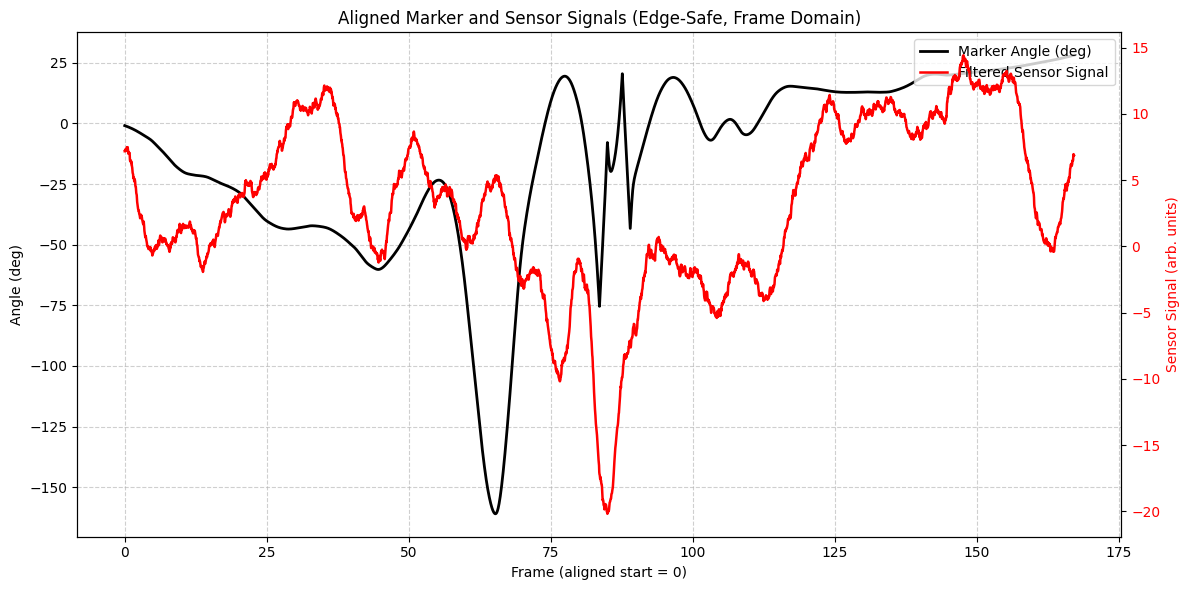

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# USER CONTROLS
# ==========================================================
fs = 600  # sampling rate (Hz)

# --- Marker filter ---
kb_m, kf_m = 50, 50

# --- Sensor filter ---
kb_s, kf_s = 45, 45

# --- Manual frame limits (same physical window) ---
start_frame = 600
end_frame   = 11514

# ==========================================================
# LOAD MARKER (VISION) DATA
# ==========================================================
angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

# Extract full columns first
frames_marker_raw = angle_data[:, 0]
angle_deg_raw     = angle_data[:, 3]

# Apply slicing directly to the loaded data based on start_frame and end_frame indices
# Python's slicing handles end_frame > array_length gracefully by stopping at the end.
frames_marker_sliced = frames_marker_raw[start_frame : end_frame + 1]
angle_deg_sliced     = angle_deg_raw[start_frame : end_frame + 1]

# ==========================================================
# LOAD SENSOR DATA
# ==========================================================
sensor_data = np.genfromtxt(
    "rotation_2.csv",
    delimiter=",",
    skip_header=1
)

sensor_data_sliced = sensor_data[start_frame:end_frame + 1, :]
rotational_sliced  = sensor_data_sliced[:, 2] - sensor_data_sliced[:, 0]

# ==========================================================
# FILTERING (CENTERED, ZERO-SHIFT)
# ==========================================================
kernel_marker = np.ones(kb_m + kf_m + 1) / (kb_m + kf_m + 1)
kernel_sensor = np.ones(kb_s + kf_s + 1) / (kb_s + kf_s + 1)

angle_filt = np.convolve(angle_deg_sliced, kernel_marker, mode="same")
rot_filt   = np.convolve(rotational_sliced, kernel_sensor, mode="same")

# ==========================================================
# EDGE ARTIFACT REMOVAL (CRITICAL STEP)
# ==========================================================
pad = max(kb_m, kf_m, kb_s, kf_s)

# Apply padding removal
angle_filt = angle_filt[pad:-pad]
rot_filt   = rot_filt[pad:-pad]
frames_trimmed = frames_marker_sliced[pad:-pad] # Trim frames_marker similarly

# ==========================================================
# FINAL ALIGNMENT (CRITICAL FOR UNEQUAL SLICE LENGTHS)
# ==========================================================
# After slicing and padding removal, the lengths of angle_filt, rot_filt, and frames_trimmed
# might still be different due to different original data lengths.
# Align them to the minimum length.
min_len = min(len(angle_filt), len(rot_filt), len(frames_trimmed))

angle_filt = angle_filt[:min_len]
rot_filt   = rot_filt[:min_len]
frames     = frames_trimmed[:min_len] # Use 'frames' for the final aligned x-axis values

# Sanity check
assert len(angle_filt) == len(rot_filt) == len(frames), "Lengths of aligned data arrays do not match!"

# Reset x-axis to start at 0 (optional, alignment preserved)
frames_rel = frames - frames[0]

# ==========================================================
# OVERLAY PLOT (DUAL Y-AXIS)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# Marker (left axis)
ax1.plot(
    frames_rel,
    angle_filt,
    color="black",
    linewidth=2,
    label="Marker Angle (deg)"
)
ax1.set_xlabel("Frame (aligned start = 0)")
ax1.set_ylabel("Angle (deg)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.grid(True, linestyle="--", alpha=0.6)

# Sensor (right axis)
ax2 = ax1.twinx()
ax2.plot(
    frames_rel,
    rot_filt,
    color="red",
    linewidth=1.8,
    label="Filtered Sensor Signal"
)
ax2.set_ylabel("Sensor Signal (arb. units)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.title("Aligned Marker and Sensor Signals (Edge-Safe, Frame Domain)")
plt.tight_layout()
plt.show()

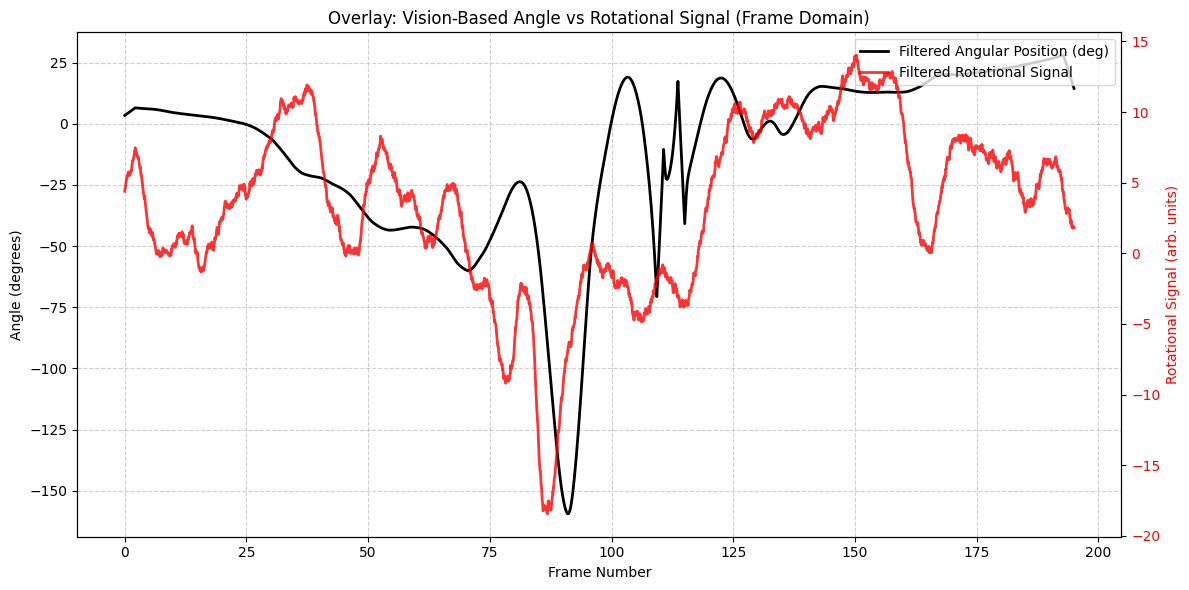

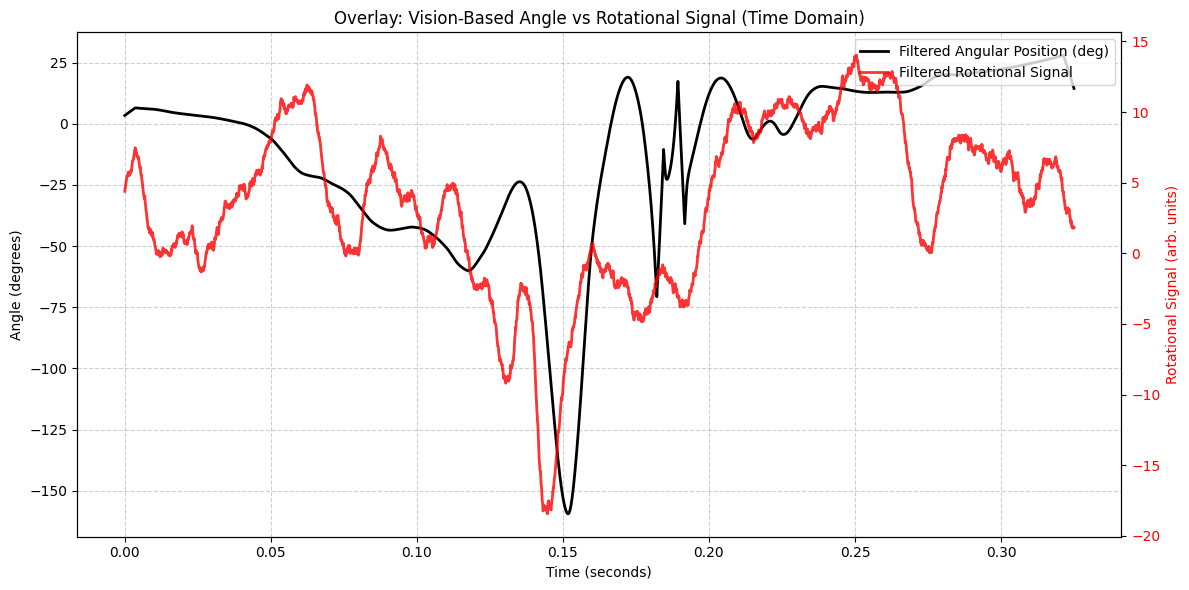

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# CONSTANTS
# ==========================================================
fs = 600                         # Sampling rate (Hz)
kf = 54
kb = 54
window = kf + kb + 1

# ==========================================================
# LOAD INTERPOLATED ANGLE DATA (Marker-based)
# ==========================================================
# CSV columns assumed:
# Frame, Nx, Ny, Angle_Deg

angle_data = np.genfromtxt(
    "Marker_Angle_Frames_600Hz.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# Moving mean filter for marker angle (MATLAB-equivalent)
# ----------------------------------------------------------
kernel = np.ones(window) / window
angle_deg_filt = np.convolve(angle_deg_raw, kernel, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"

start, end = 600, 11514
data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

# Rotational proxy
rotational = data[:, 2] - data[:, 0]

# Moving mean filter for rotational signal
rotational_filt = np.convolve(rotational, kernel, mode="same")

# ==========================================================
# FRAME ALIGNMENT
# ==========================================================
min_len = min(len(frames_angle), len(rotational_filt))

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# TIME VECTOR (seconds)
# ==========================================================
time_sec = frames / fs

# ==========================================================
# FIGURE 1: OVERLAY vs FRAME NUMBER (DUAL Y-AXIS)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Angle (left axis) ---
ax1.plot(
    frames,
    angle_deg_filt,
    color="black",
    linewidth=2,
    label="Filtered Angular Position (deg)"
)
ax1.set_xlabel("Frame Number")
ax1.set_ylabel("Angle (degrees)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.grid(True, linestyle="--", alpha=0.6)

# --- Rotational proxy (right axis) ---
ax2 = ax1.twinx()
ax2.plot(
    frames,
    rotational_filt,
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Rotational Signal"
)
ax2.set_ylabel("Rotational Signal (arb. units)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# --- Legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Overlay: Vision-Based Angle vs Rotational Signal (Frame Domain)")
plt.tight_layout()
plt.show()

# ==========================================================
# FIGURE 2: OVERLAY vs TIME (seconds)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Angle (left axis) ---
ax1.plot(
    time_sec,
    angle_deg_filt,
    color="black",
    linewidth=2,
    label="Filtered Angular Position (deg)"
)
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Angle (degrees)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.grid(True, linestyle="--", alpha=0.6)

# --- Rotational proxy (right axis) ---
ax2 = ax1.twinx()
ax2.plot(
    time_sec,
    rotational_filt,
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Rotational Signal"
)
ax2.set_ylabel("Rotational Signal (arb. units)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# --- Legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Overlay: Vision-Based Angle vs Rotational Signal (Time Domain)")
plt.tight_layout()
plt.show()


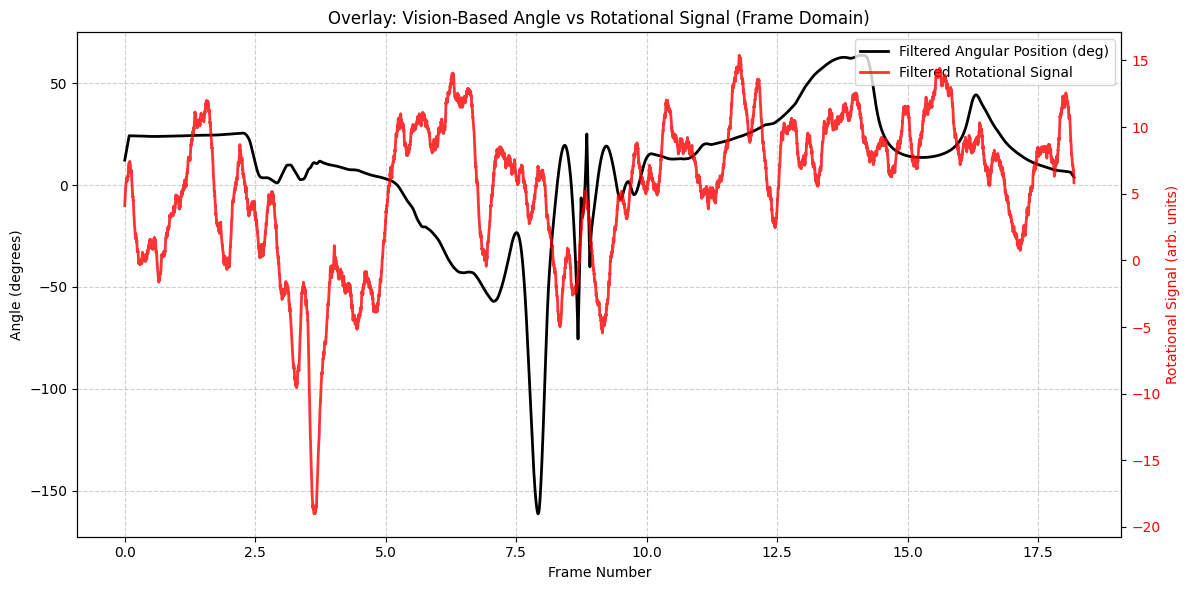

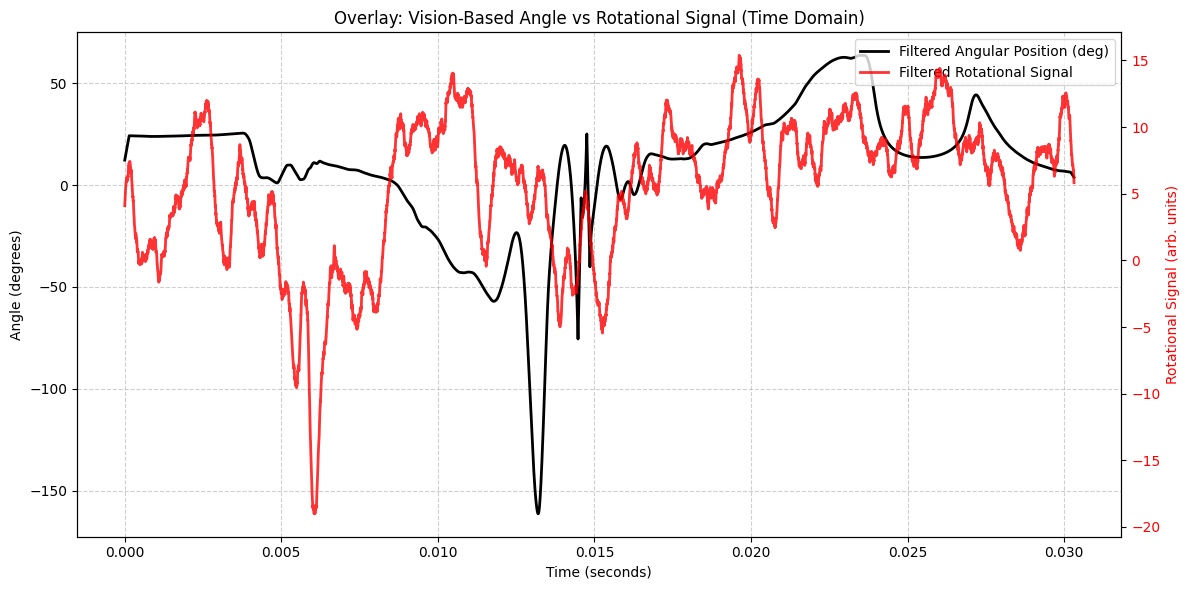

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# CONSTANTS
# ==========================================================
fs = 600                         # Sampling rate (Hz)
kf = 50
kb = 50
window = kf + kb + 1

# ==========================================================
# LOAD INTERPOLATED ANGLE DATA (Marker-based)
# ==========================================================
# CSV columns assumed:
# Frame, Nx, Ny, Angle_Deg

angle_data = np.genfromtxt(
    "ThewholedatacorrectinterpolationANGELSnew.csv",
    delimiter=",",
    skip_header=1
)

frames_angle = angle_data[:, 0]
angle_deg_raw = angle_data[:, 3]

# ----------------------------------------------------------
# Moving mean filter for marker angle
# ----------------------------------------------------------
kernel = np.ones(window) / window
angle_deg_filt = np.convolve(angle_deg_raw, kernel, mode="same")

# ==========================================================
# LOAD ROTATIONAL SENSOR DATA
# ==========================================================
rot_file = "rotation_2.csv"

start, end = 600, 11514
data = np.genfromtxt(rot_file, delimiter=",", skip_header=1)
data = data[start:end, :]

# Rotational proxy
rotational = data[:, 2] - data[:, 0]

# Moving mean filter for rotational signal
rotational_filt = np.convolve(rotational, kernel, mode="same")

# ==========================================================
# ALIGN DATASETS TO THE SHORTEST LENGTH
# ==========================================================
marker_len = len(frames_angle)
sensor_len = len(rotational_filt)

min_len = min(marker_len, sensor_len)

frames = frames_angle[:min_len]
angle_deg_filt = angle_deg_filt[:min_len]
rotational_filt = rotational_filt[:min_len]

# ==========================================================
# TIME VECTOR (seconds)
# ==========================================================
time_sec = frames / fs

# ==========================================================
# FIGURE 1: OVERLAY vs FRAME NUMBER
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(
    frames,
    angle_deg_filt,
    color="black",
    linewidth=2,
    label="Filtered Angular Position (deg)"
)
ax1.set_xlabel("Frame Number")
ax1.set_ylabel("Angle (degrees)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.grid(True, linestyle="--", alpha=0.6)

ax2 = ax1.twinx()
ax2.plot(
    frames,
    rotational_filt,
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Rotational Signal"
)
ax2.set_ylabel("Rotational Signal (arb. units)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Overlay: Vision-Based Angle vs Rotational Signal (Frame Domain)")
plt.tight_layout()
plt.show()

# ==========================================================
# FIGURE 2: OVERLAY vs TIME (seconds)
# ==========================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(
    time_sec,
    angle_deg_filt,
    color="black",
    linewidth=2,
    label="Filtered Angular Position (deg)"
)
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Angle (degrees)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.grid(True, linestyle="--", alpha=0.6)

ax2 = ax1.twinx()
ax2.plot(
    time_sec,
    rotational_filt,
    color="red",
    linewidth=2,
    alpha=0.8,
    label="Filtered Rotational Signal"
)
ax2.set_ylabel("Rotational Signal (arb. units)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Overlay: Vision-Based Angle vs Rotational Signal (Time Domain)")
plt.tight_layout()
plt.show()